# Data Exploration and Preprocessing

## Data Exploration

In [44]:
pip install pandas xlsxwriter

Note: you may need to restart the kernel to use updated packages.


### Data Fetch and Data Observation

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import LabelBinarizer
from sklearn.cluster import KMeans, AgglomerativeClustering
import math


In [9]:
data = pd.read_csv("24869570.csv")

In [10]:
data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-11-23,Darwin,29.6,34.9,0.0,4.4,10.8,WNW,43.0,W,...,66.0,50.0,1007.3,1003.7,6.0,7.0,32.1,34.6,No,No
1,2012-01-17,Dartmoor,16.1,38.8,0.0,12.0,6.1,N,63.0,N,...,35.0,19.0,1011.0,1008.3,NaN,NaN,28.4,36.0,No,No
2,2016-05-07,CoffsHarbour,12.1,24.5,0.0,NaN,NaN,E,20.0,SW,...,76.0,64.0,1021.2,1018.9,NaN,NaN,20.6,23.8,No,No
3,2016-06-01,Witchcliffe,3.9,19.2,0.2,NaN,NaN,NNE,17.0,NaN,...,100.0,51.0,1024.3,1021.8,NaN,NaN,9.2,18.7,No,No
4,2010-05-20,MelbourneAirport,5.1,17.7,0.0,2.0,4.9,N,28.0,NW,...,69.0,45.0,1023.4,1020.8,7.0,2.0,10.3,17.0,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2613,2014-08-19,MelbourneAirport,9.3,11.8,3.8,0.2,0.2,S,31.0,SSE,...,83.0,63.0,1024.9,1023.9,7.0,8.0,10.5,11.4,Yes,No
2614,2011-06-21,Nuriootpa,5.8,11.3,19.4,5.2,5.2,WSW,65.0,W,...,85.0,66.0,1010.5,1012.7,6.0,3.0,6.9,10.1,Yes,Yes
2615,2009-03-17,Sale,13.1,20.5,0.0,4.8,7.6,W,56.0,W,...,81.0,50.0,1015.1,1015.4,6.0,6.0,14.9,19.2,No,No
2616,2009-01-27,Townsville,23.8,29.7,19.0,5.4,1.2,SSE,39.0,SSE,...,83.0,89.0,1011.1,1008.1,8.0,7.0,27.3,25.2,Yes,Yes


In [11]:
data.shape

(2618, 23)

In [16]:
data.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

### Statistics Table and Frequency Graphs

In [19]:
summary = data.describe(include="all")
numeric_columns = data.select_dtypes(include=['float64']).columns
summary.loc["Variance", numeric_columns] = data[numeric_columns].var()
summary.loc["Range", numeric_columns] = data[numeric_columns].max() - data[numeric_columns].min()
summary.loc["Median", numeric_columns] = data[numeric_columns].median()
summary.loc["Mode", numeric_columns] = data[numeric_columns].mode().iloc[0]

summary


    

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,2618,2618,2588.000000,2586.000000,2557.000000,1514.000000,1372.000000,2436,2437.000000,2434,...,2562.000000,2530.000000,2354.000000,2356.000000,1621.000000,1553.000000,2584.000000,2551.000000,2557,2553
unique,1782,49,NaN,NaN,NaN,NaN,NaN,16,NaN,16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2
top,2015-03-28,Brisbane,NaN,NaN,NaN,NaN,NaN,W,NaN,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No
freq,9,81,NaN,NaN,NaN,NaN,NaN,187,NaN,230,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1960,1973
mean,NaN,NaN,12.289413,23.234068,2.265272,5.549207,7.653936,NaN,40.095199,NaN,...,68.994536,51.651779,1017.517842,1015.122666,4.487353,4.539601,17.035526,21.706194,NaN,NaN
std,NaN,NaN,6.379817,7.299389,7.666699,4.574478,3.852510,NaN,13.816471,NaN,...,18.920041,20.958754,7.147540,7.112796,2.845940,2.709259,6.547281,7.109132,NaN,NaN
min,NaN,NaN,-6.200000,0.400000,0.000000,0.000000,0.000000,NaN,9.000000,NaN,...,8.000000,4.000000,989.700000,986.100000,0.000000,0.000000,-3.000000,0.000000,NaN,NaN
25%,NaN,NaN,7.700000,17.800000,0.000000,2.600000,4.800000,NaN,31.000000,NaN,...,57.000000,36.000000,1012.700000,1010.100000,1.000000,2.000000,12.300000,16.400000,NaN,NaN
50%,NaN,NaN,12.000000,22.600000,0.000000,4.600000,8.500000,NaN,39.000000,NaN,...,70.000000,52.000000,1017.600000,1015.100000,5.000000,5.000000,16.550000,21.100000,NaN,NaN
75%,NaN,NaN,17.100000,28.600000,0.800000,7.500000,10.700000,NaN,48.000000,NaN,...,83.000000,66.000000,1022.300000,1020.000000,7.000000,7.000000,21.825000,26.600000,NaN,NaN


In [21]:
for column in data.select_dtypes(include=["object"]):
    print(f"frequency distribution for {column}")
    print(data[column].value_counts())

frequency distribution for Date
Date
2015-03-28    9
2009-08-03    6
2016-06-30    5
2016-09-01    5
2016-10-12    5
             ..
2010-08-21    1
2009-04-03    1
2016-01-23    1
2016-01-04    1
2015-09-25    1
Name: count, Length: 1782, dtype: int64
frequency distribution for Location
Location
Brisbane            81
Melbourne           74
Bendigo             72
Canberra            65
Sydney              65
NorahHead           64
Launceston          64
PearceRAAF          62
MelbourneAirport    60
Witchcliffe         60
Watsonia            60
PerthAirport        60
MountGinini         60
Albany              59
Hobart              59
Adelaide            58
Perth               58
Cobar               57
Moree               57
Dartmoor            57
Townsville          56
Richmond            56
Mildura             55
Woomera             53
WaggaWagga          52
Walpole             52
NorfolkIsland       52
Cairns              52
Darwin              51
BadgerysCreek       51
Ballarat    

In [23]:
date = pd.to_datetime(data["Date"])
year = date.dt.year
print(year.value_counts())

Date
2016    346
2015    341
2009    313
2013    301
2014    295
2010    292
2012    268
2011    267
2017    160
2008     35
Name: count, dtype: int64


In [43]:
year.describe()

count    2618.000000
mean     2012.828113
std         2.556406
min      2008.000000
25%      2011.000000
50%      2013.000000
75%      2015.000000
max      2017.000000
Name: Date, dtype: float64

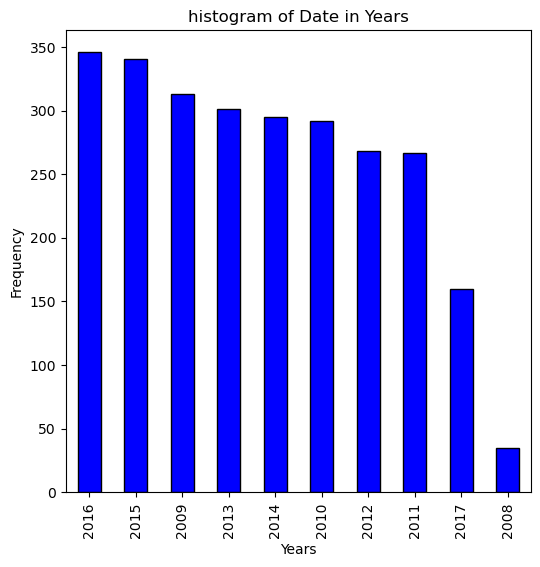

Text(0.5, 1.0, 'Sample Pie Chart for Date in Years')

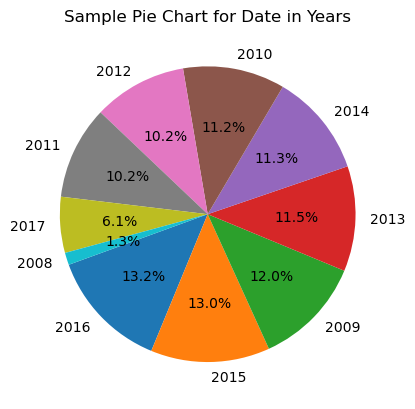

In [25]:
plt.figure(figsize=(6,6))
year.value_counts().plot(kind="bar", color="blue", edgecolor="black")
plt.title(f"Bar Chart of Date in Years")
plt.xlabel("Years")
plt.ylabel("Frequency")
plt.show()

plt.pie(year.value_counts(), labels=year.value_counts().index, autopct='%1.1f%%', startangle=200)
plt.title(f"Sample Pie Chart for Date in Years")


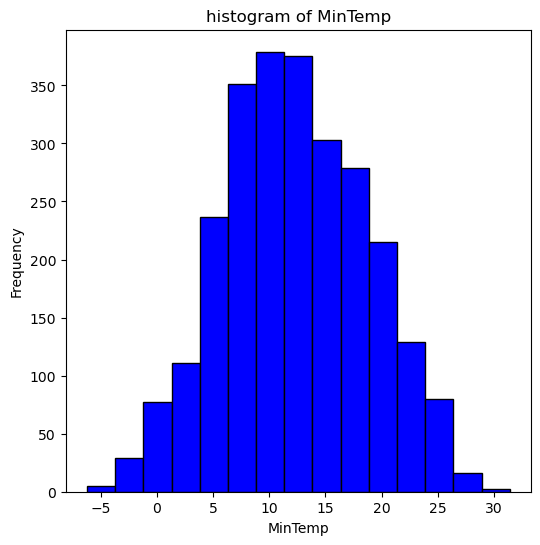

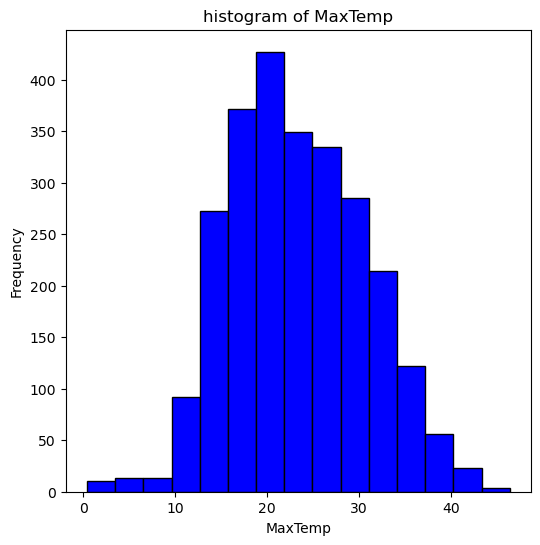

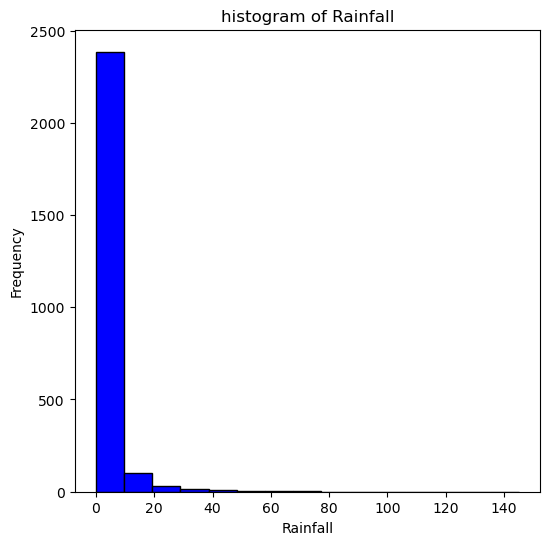

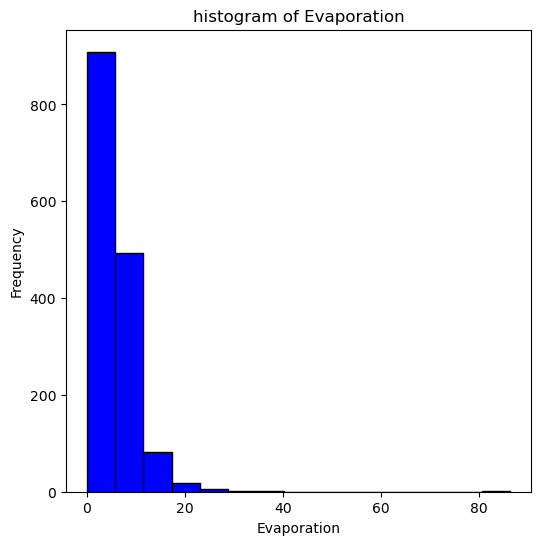

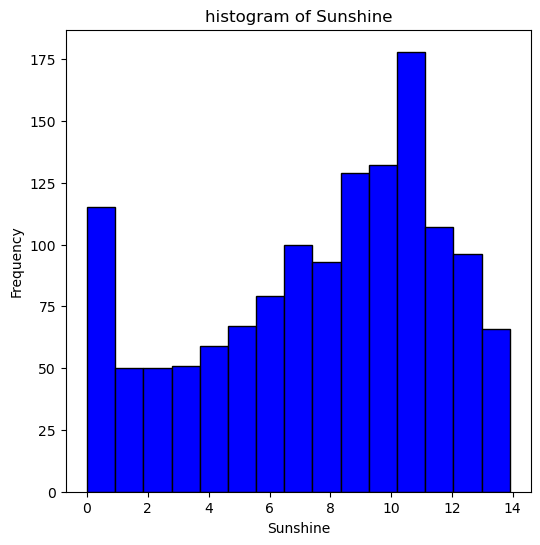

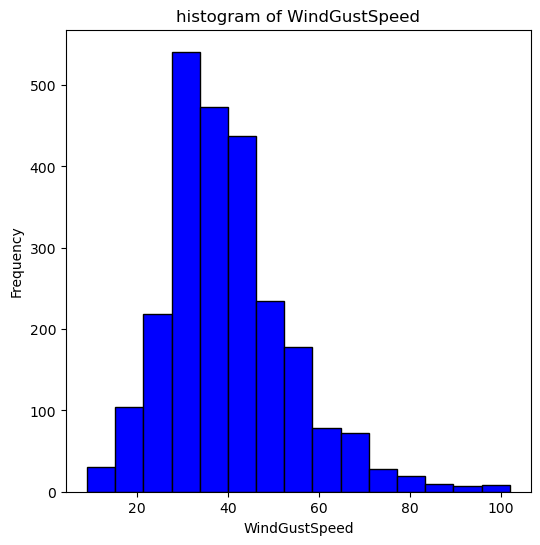

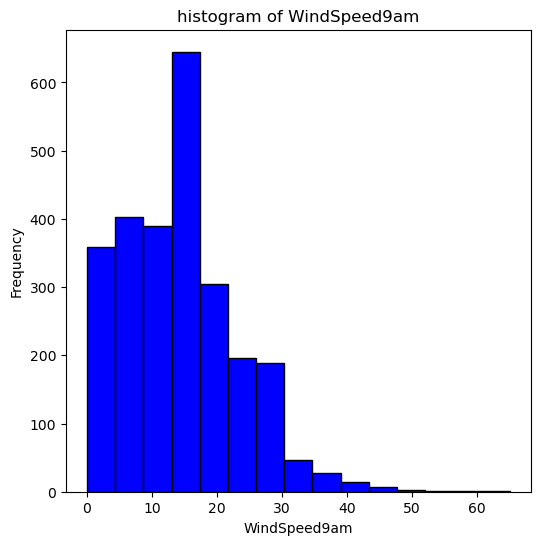

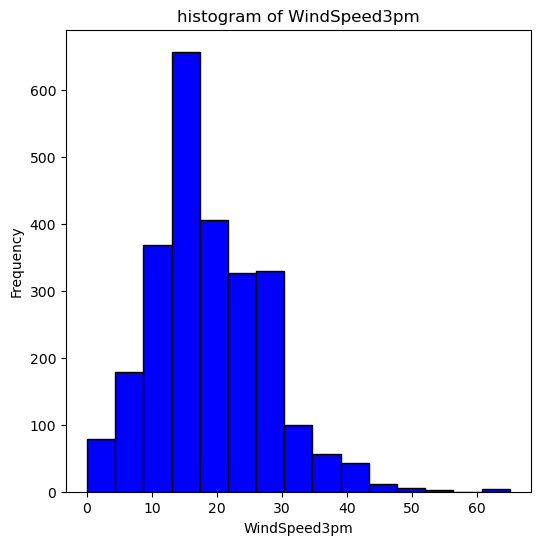

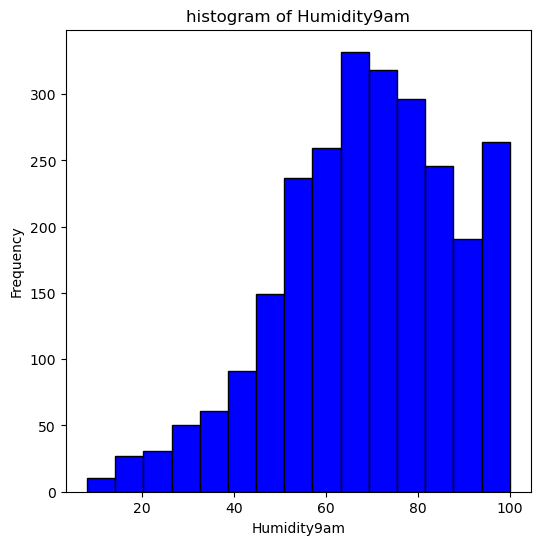

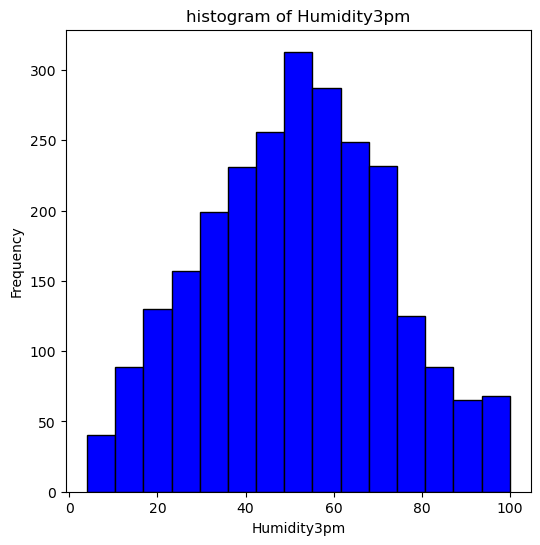

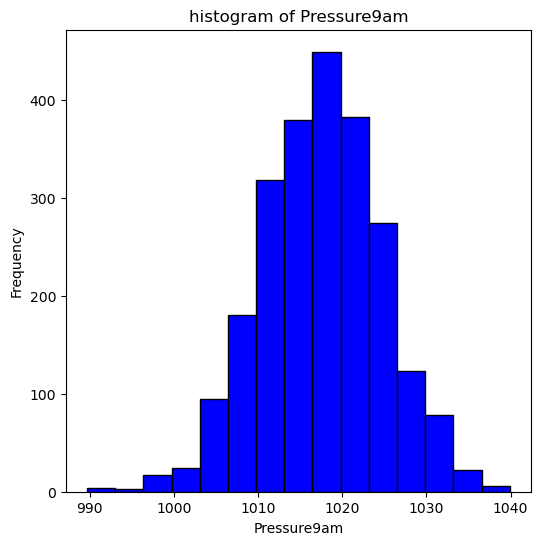

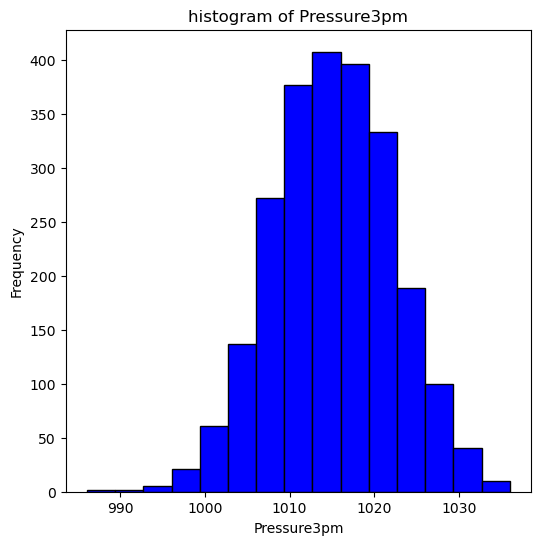

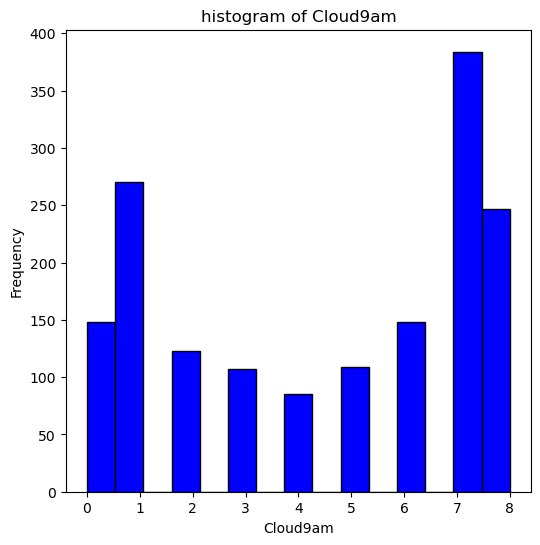

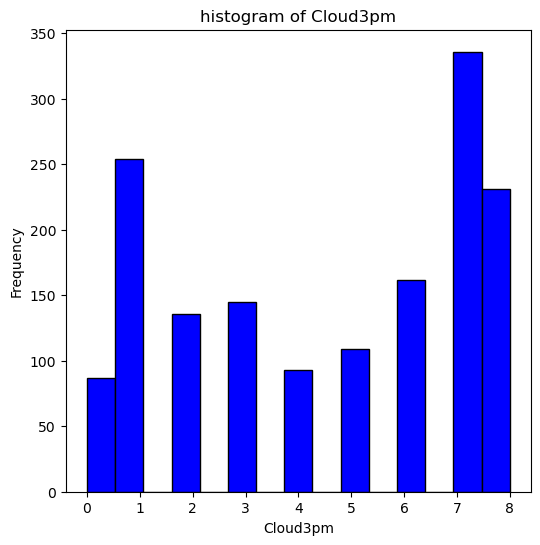

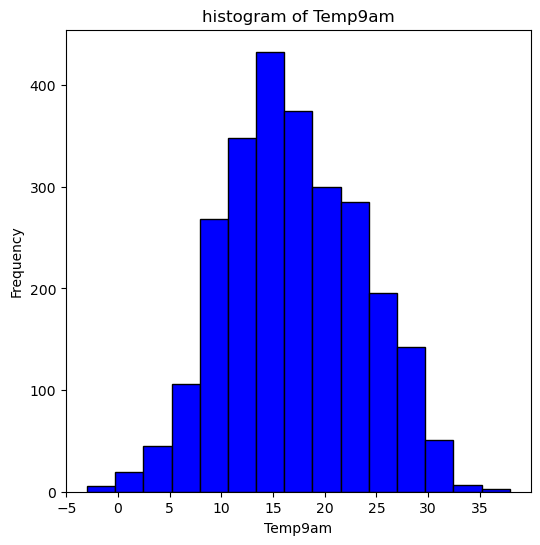

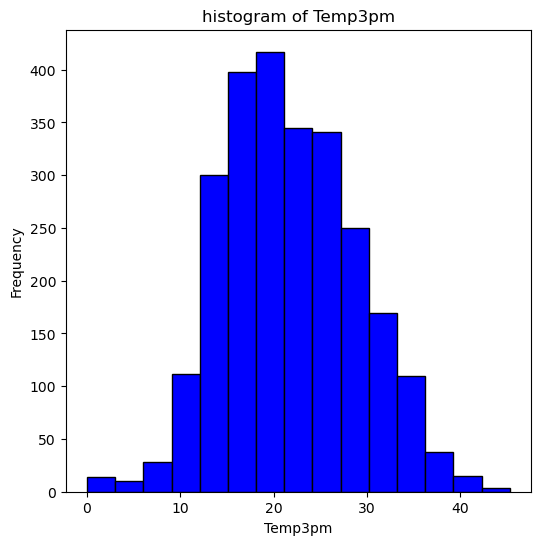

In [27]:
for column in data.select_dtypes(include=["float64"]).columns:
    plt.figure(figsize=(6,6))
    data[column].plot.hist(bins=15, color="blue", edgecolor="black")
    plt.title(f"histogram of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()


    

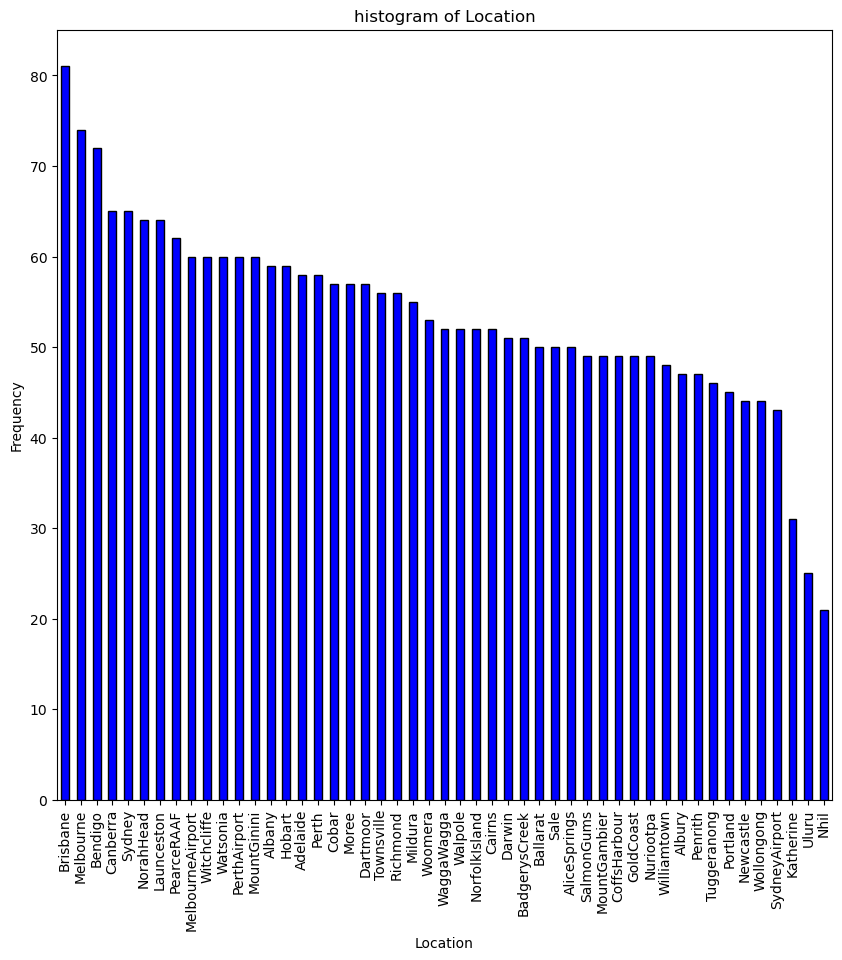

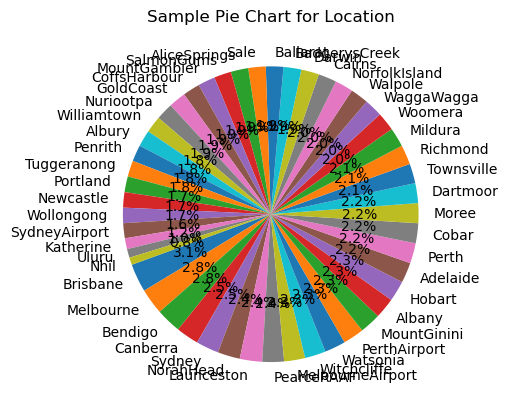

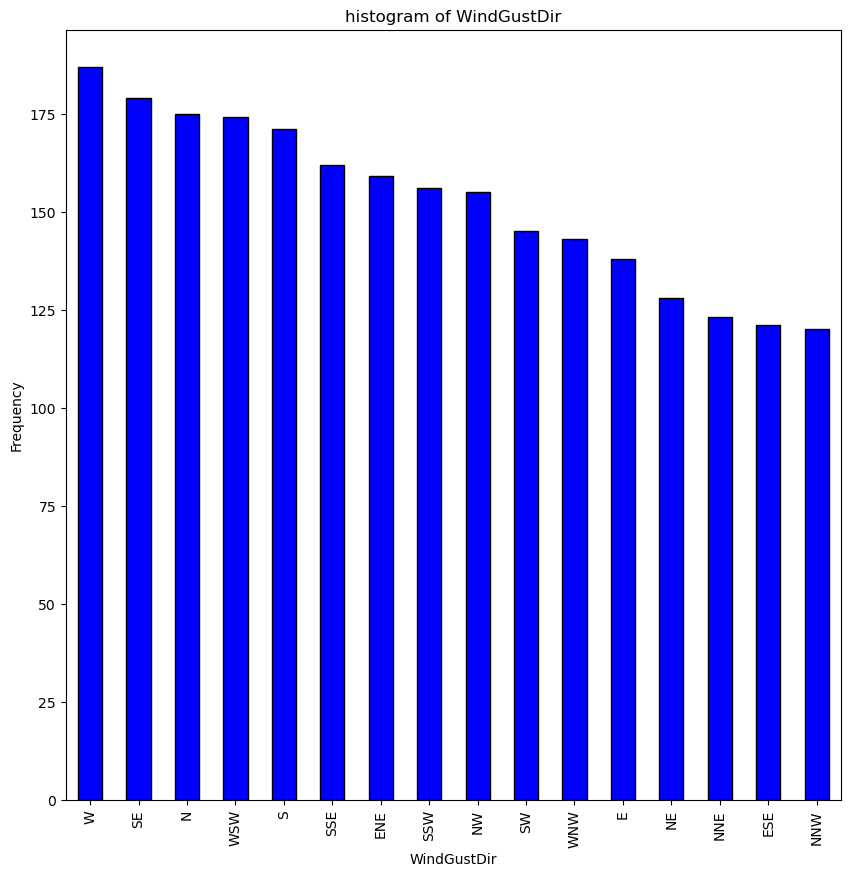

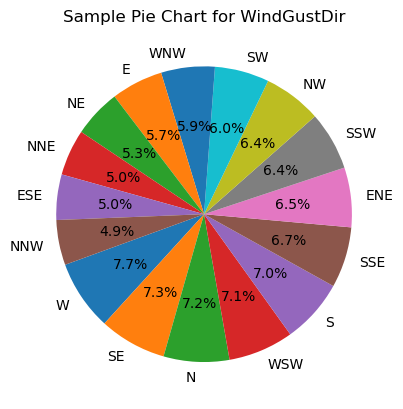

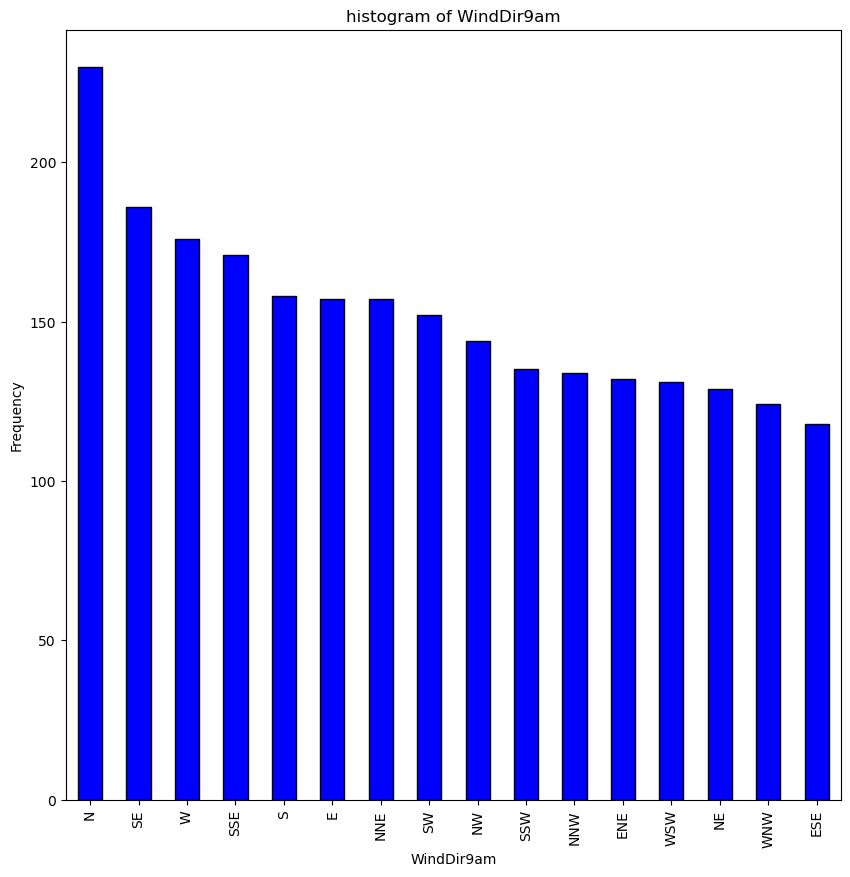

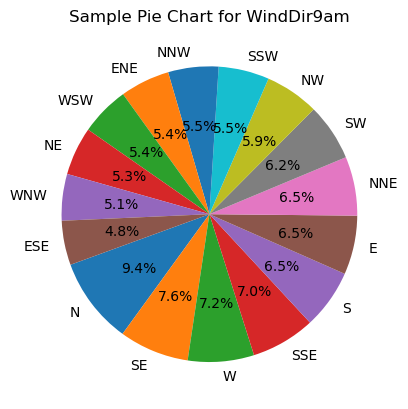

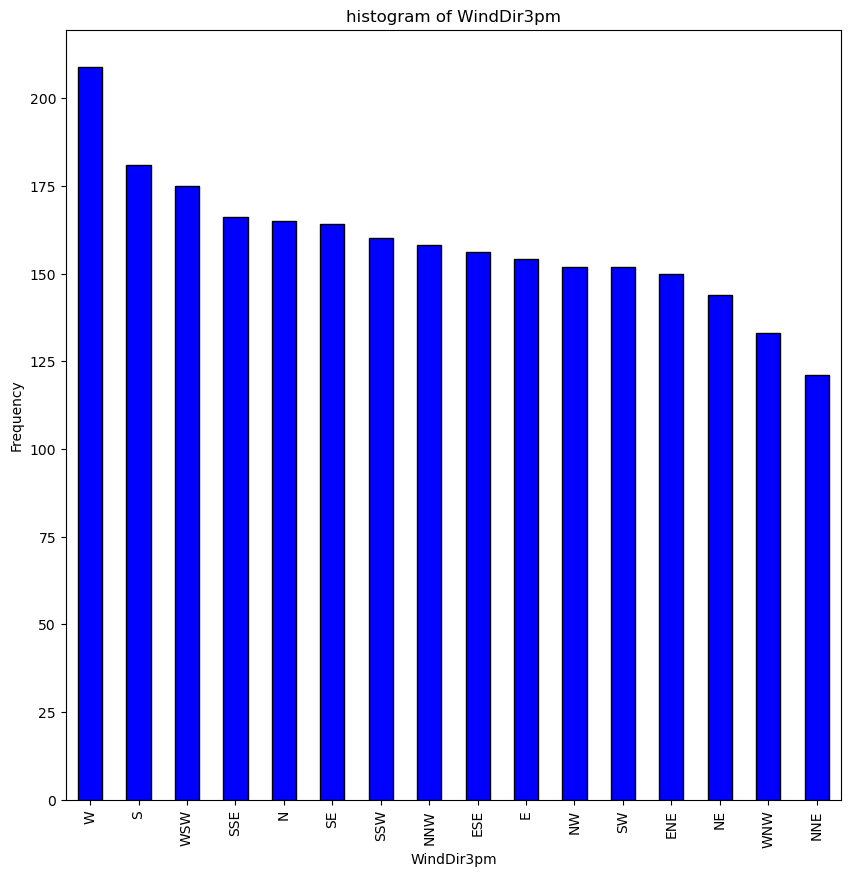

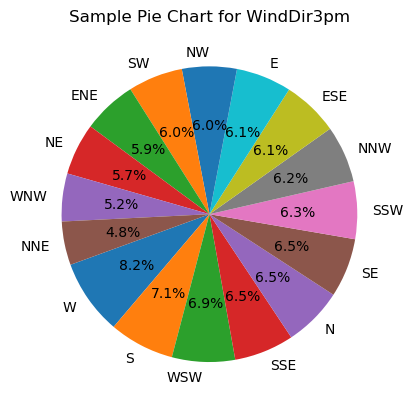

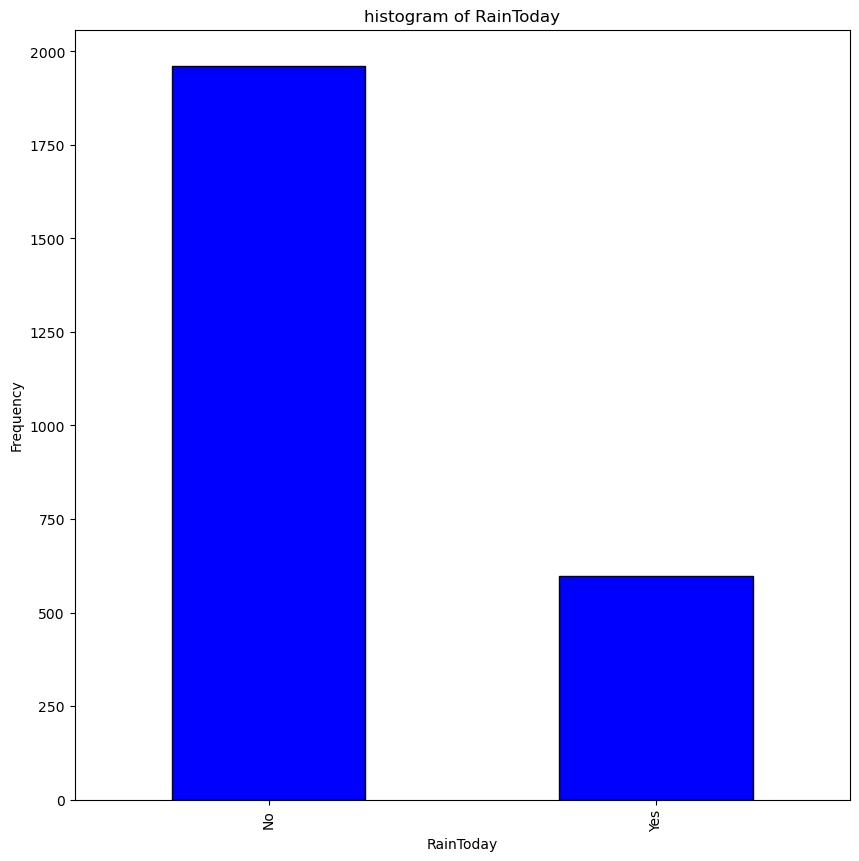

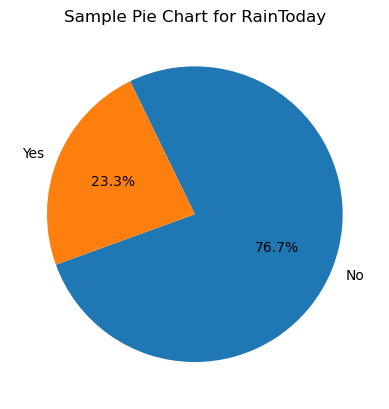

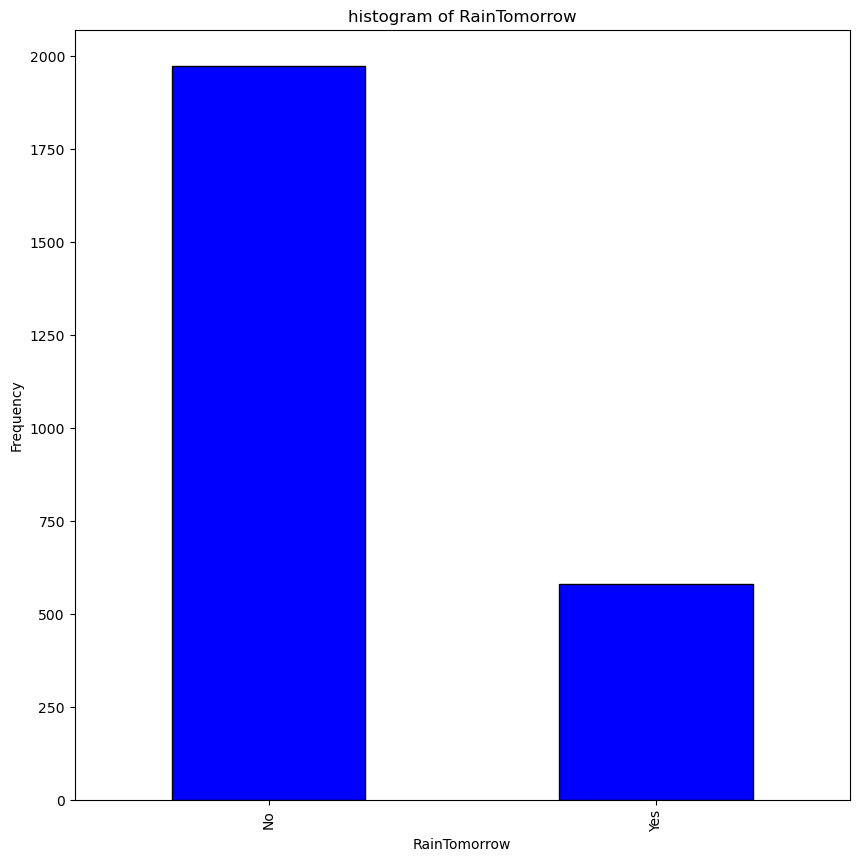

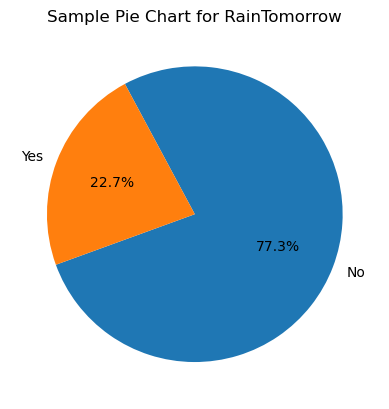

In [29]:
for column in data.select_dtypes(include=["object"]).columns:
    if column == "Date":
        continue
    plt.figure(figsize=(10,10))
    data[column].value_counts().plot(kind="bar", color="blue", edgecolor="black")
    plt.title(f"histogram of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

    plt.pie(data[column].value_counts(), labels=data[column].value_counts().index, autopct='%1.1f%%', startangle=200)
    plt.title(f"Sample Pie Chart for {column}")

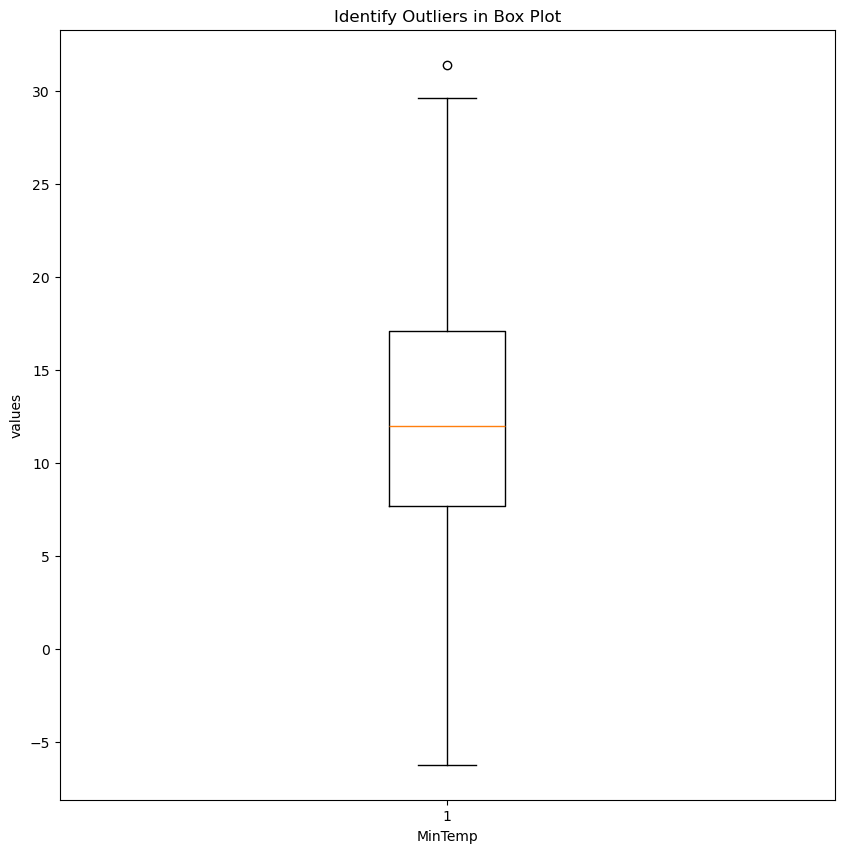

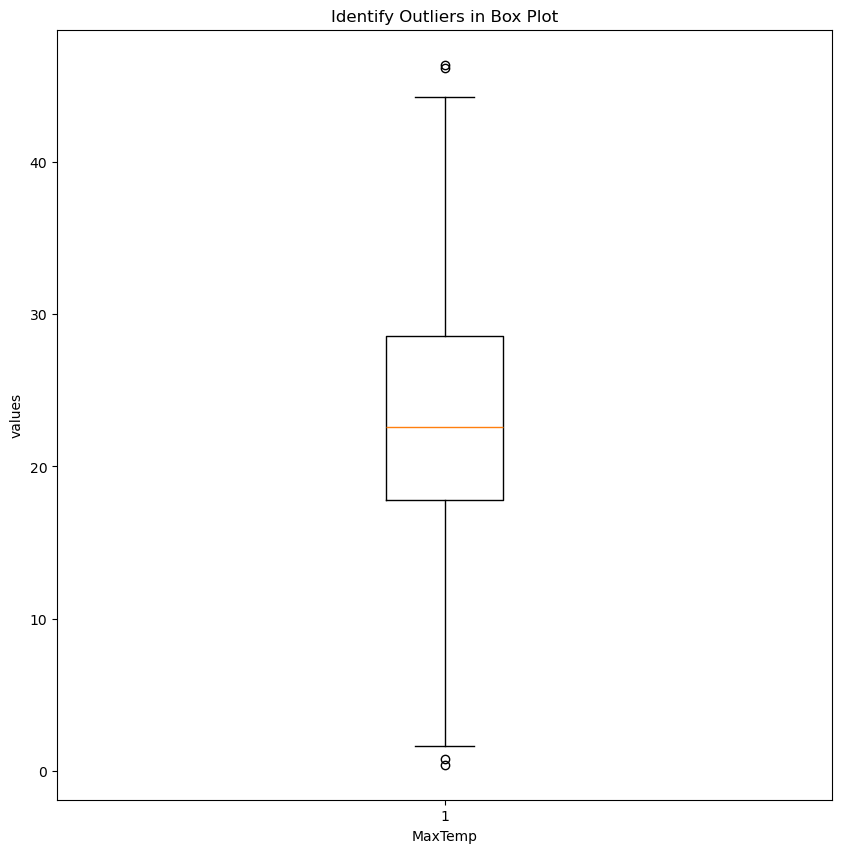

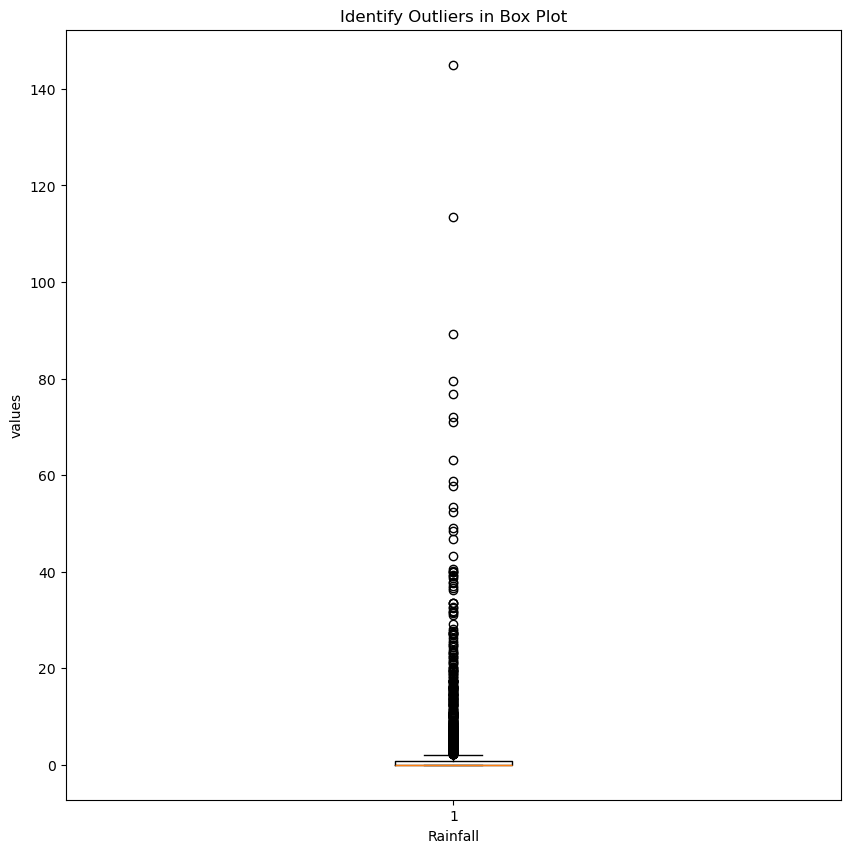

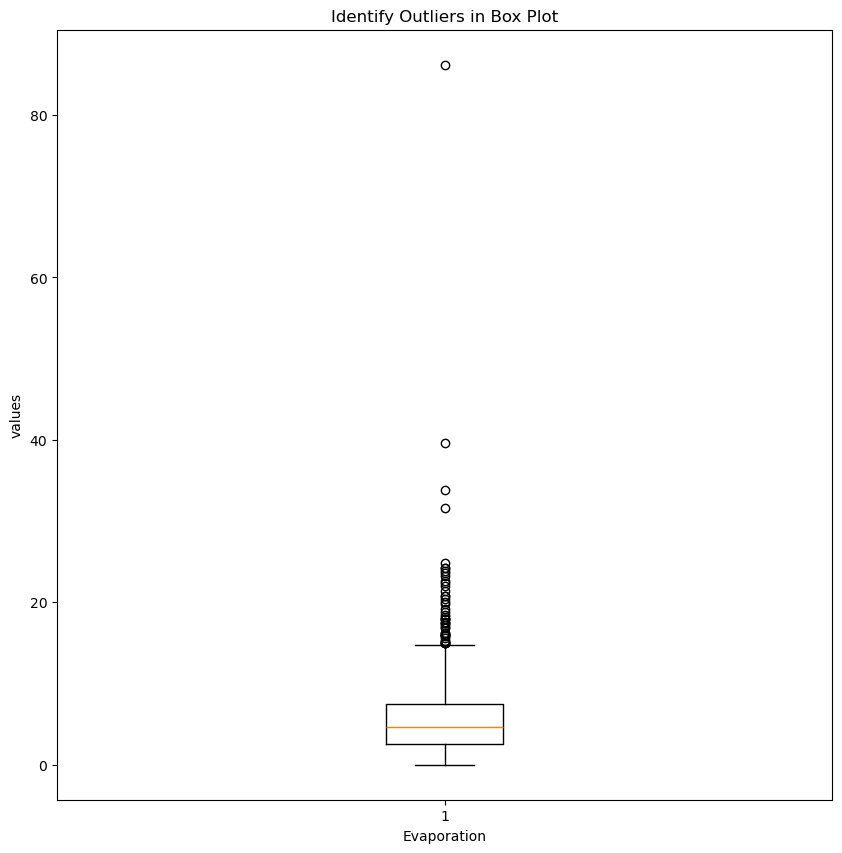

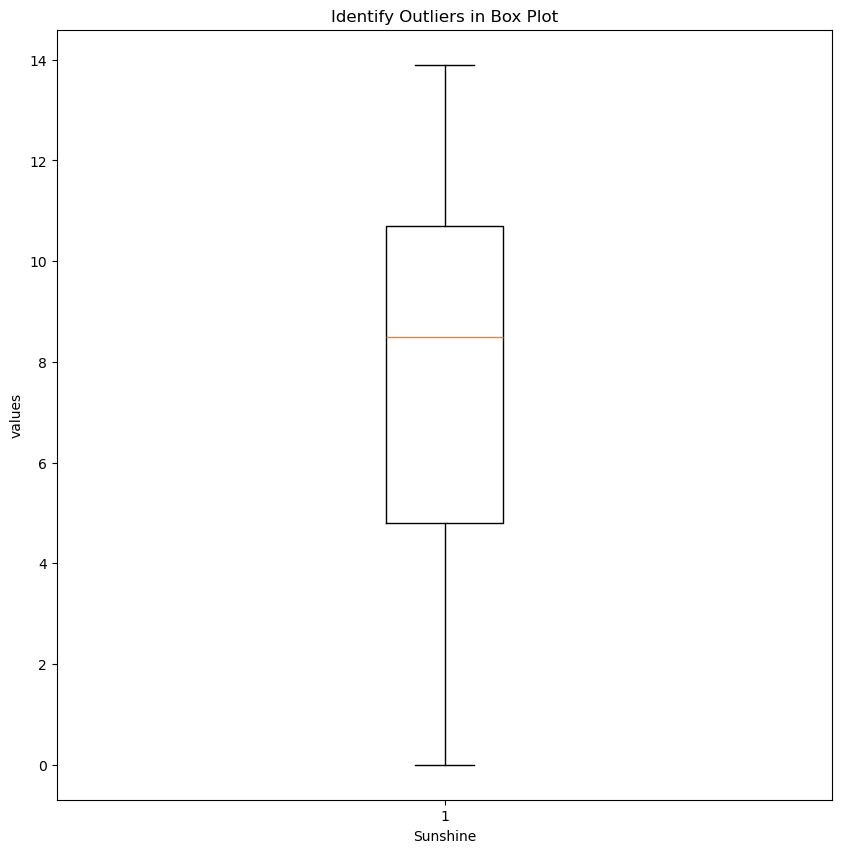

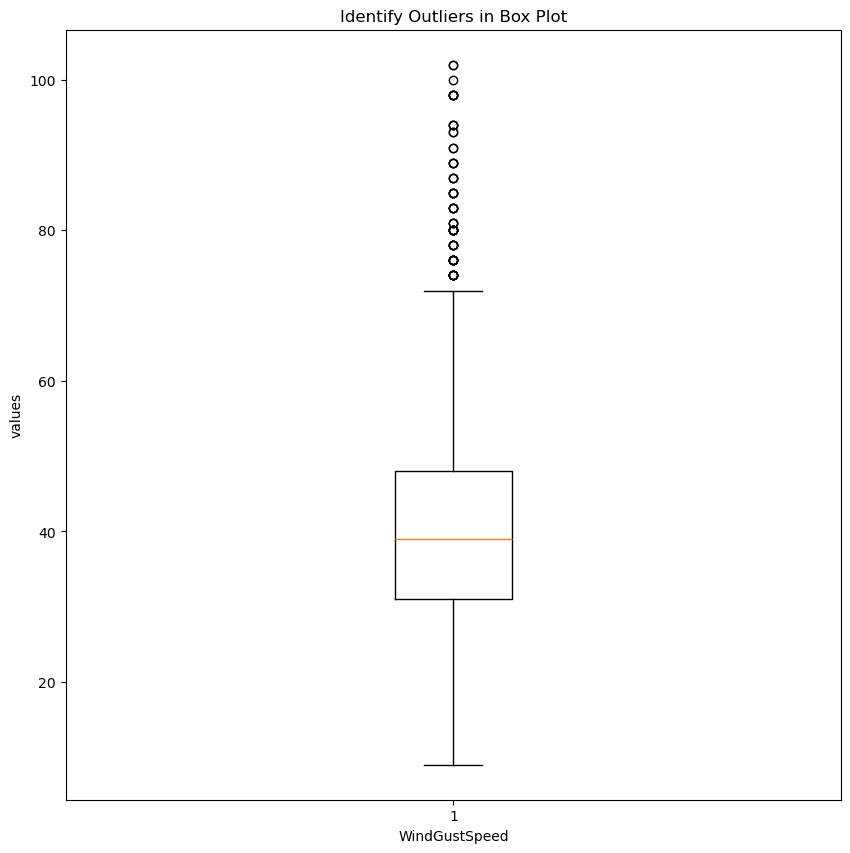

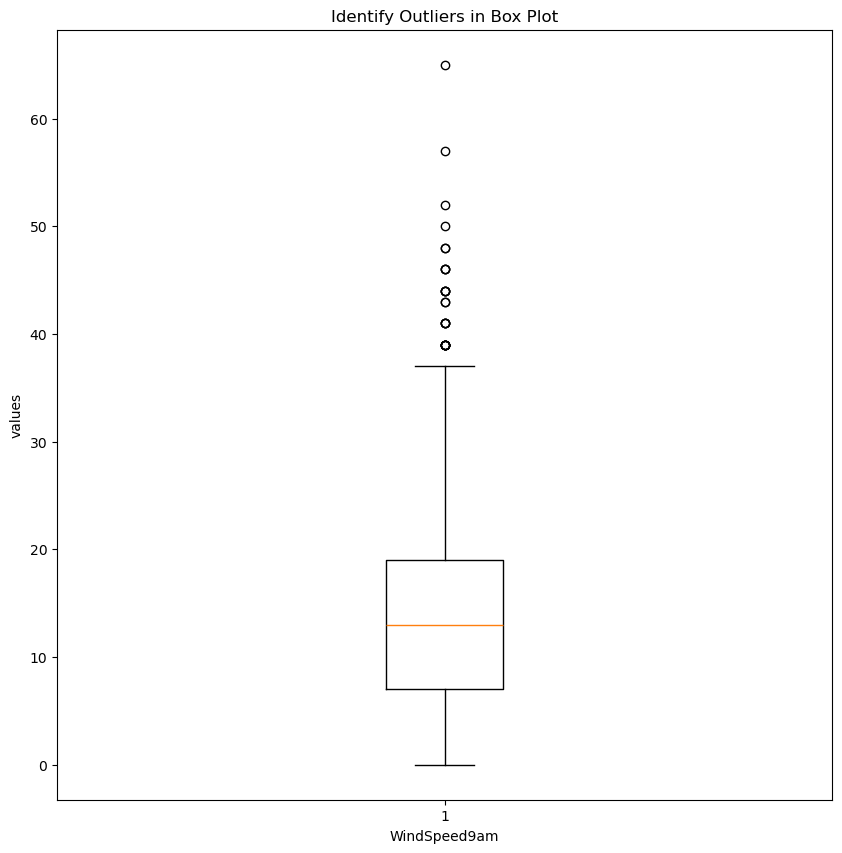

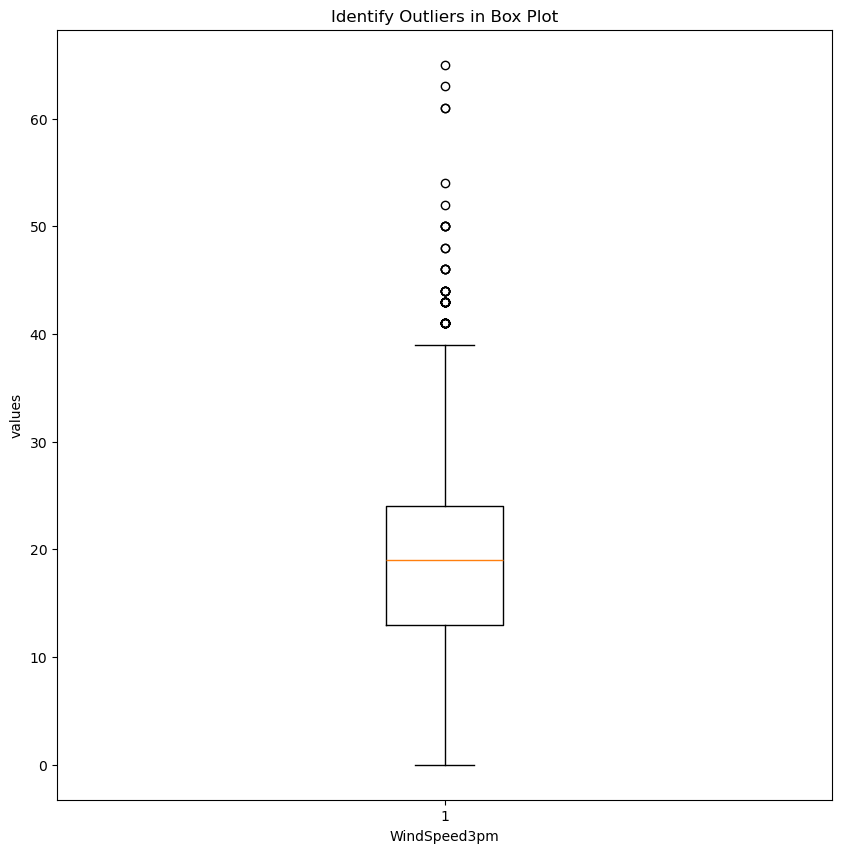

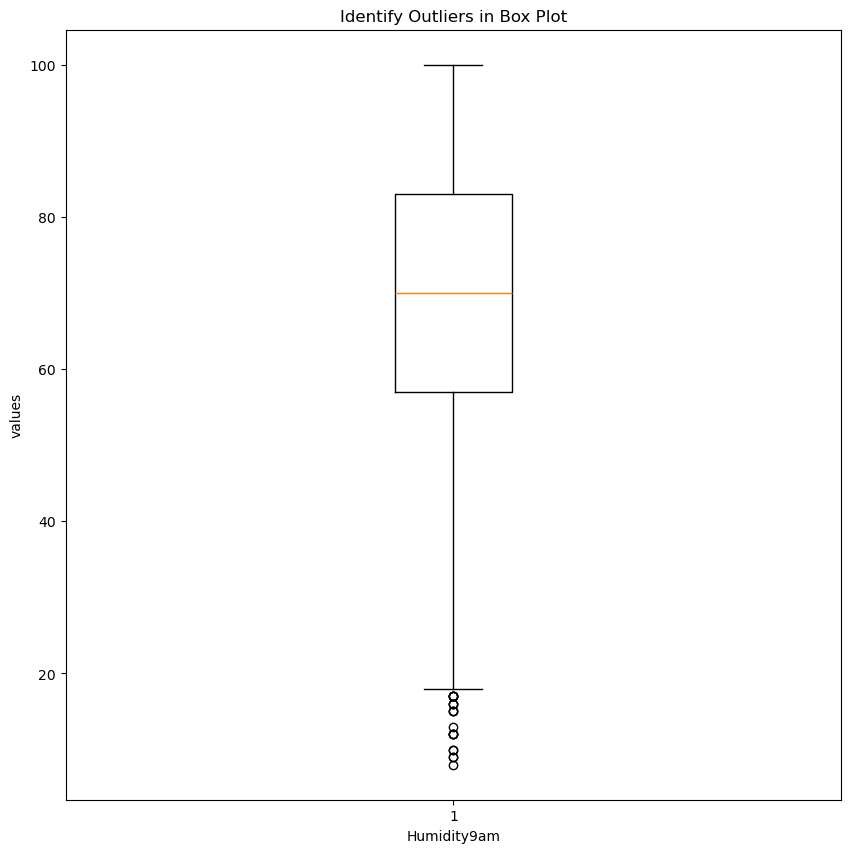

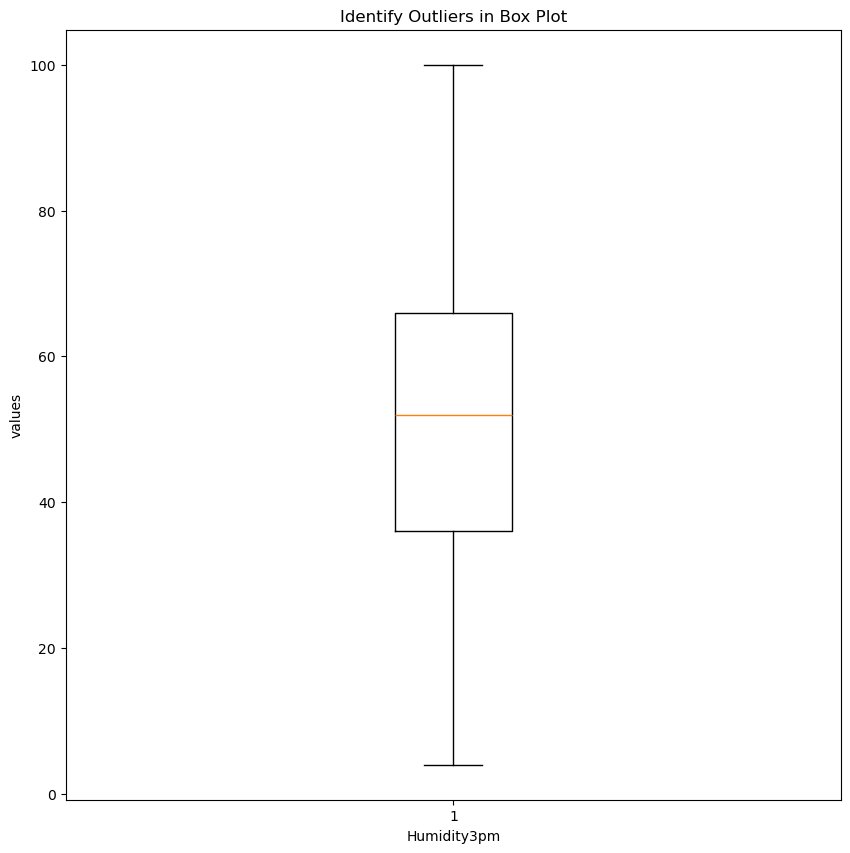

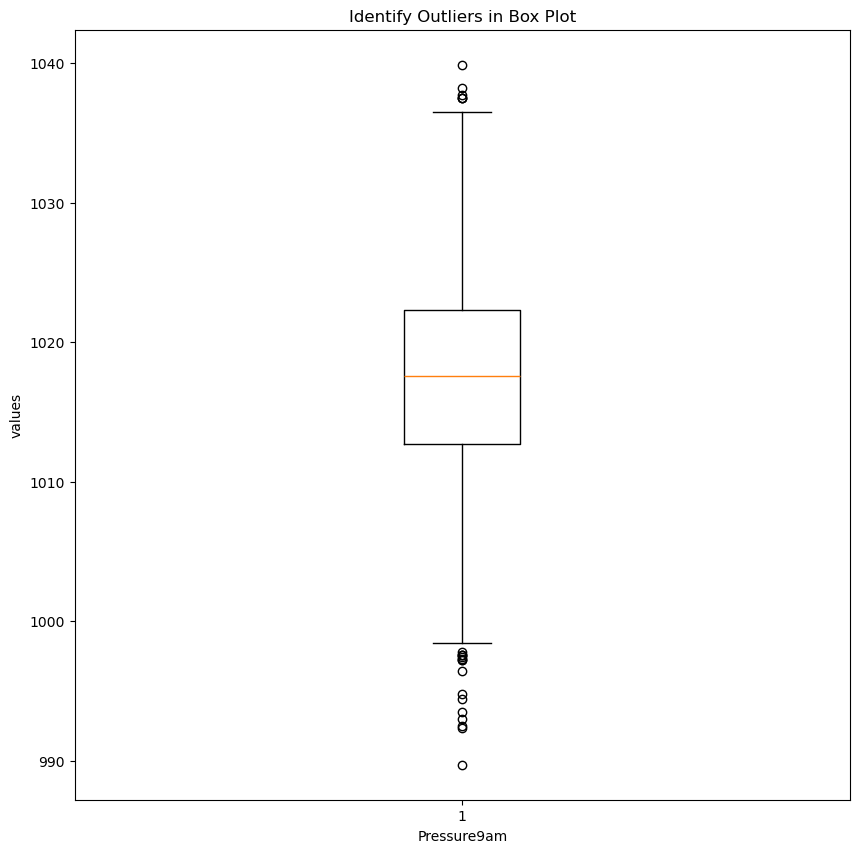

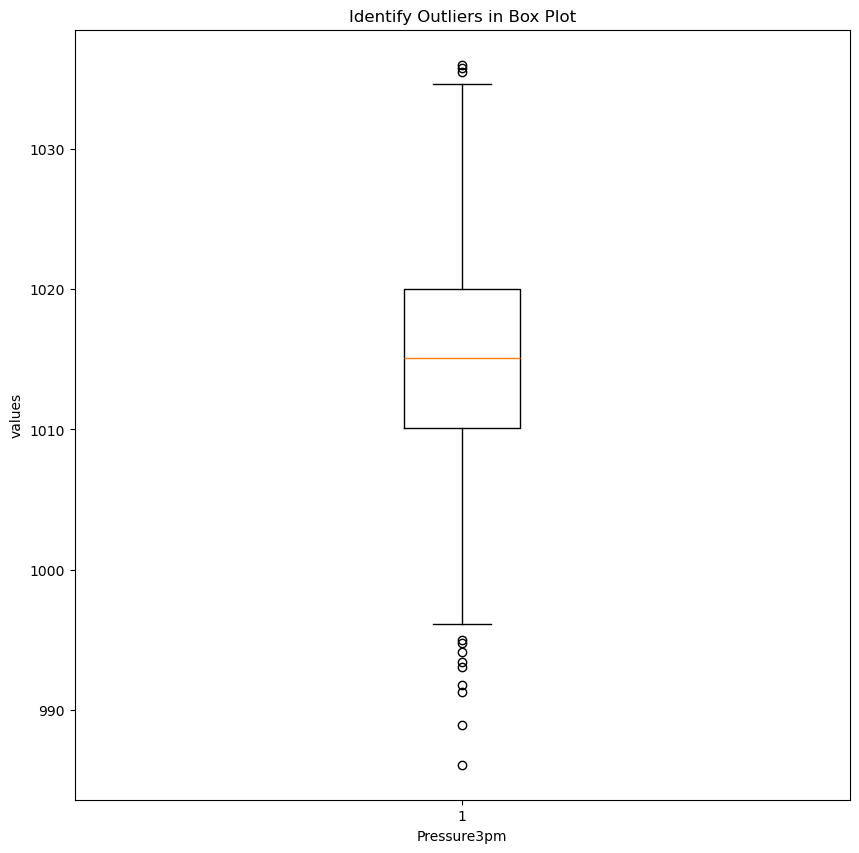

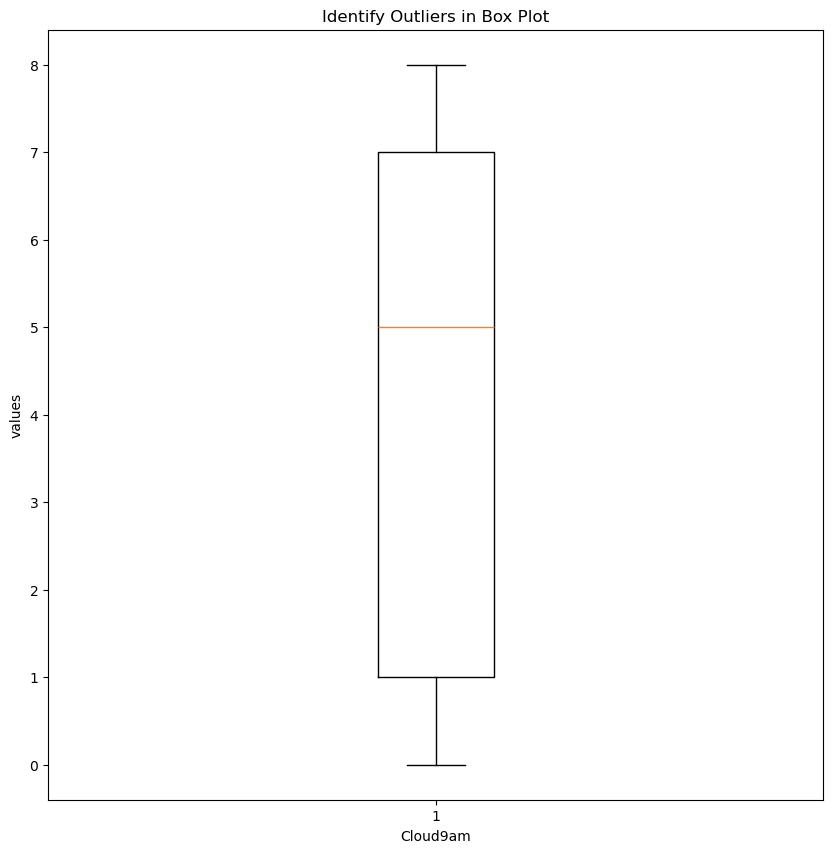

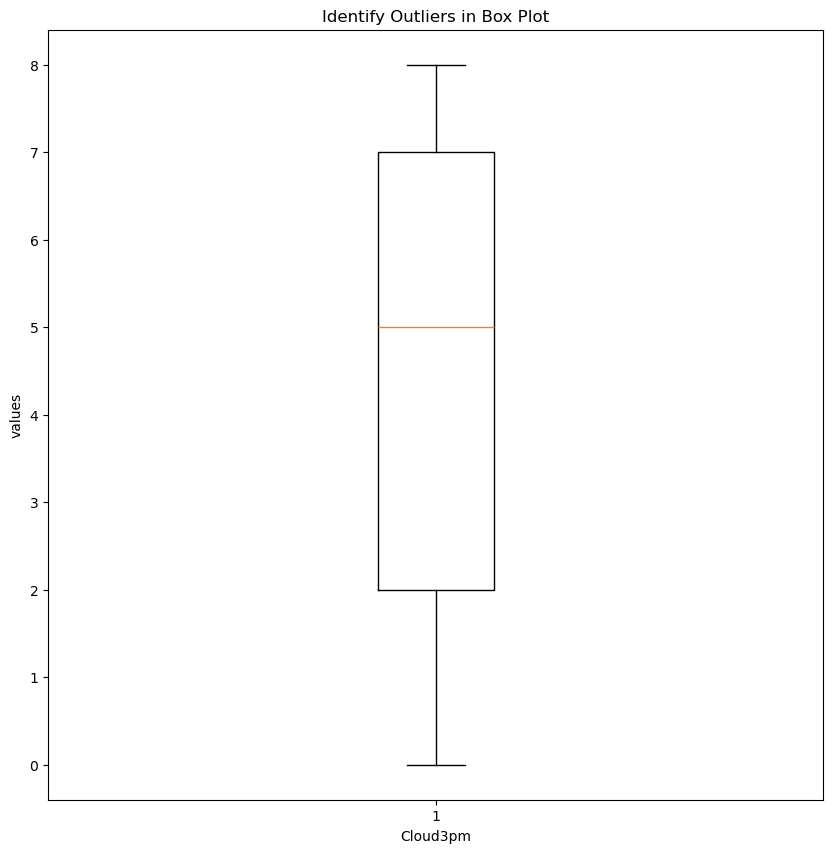

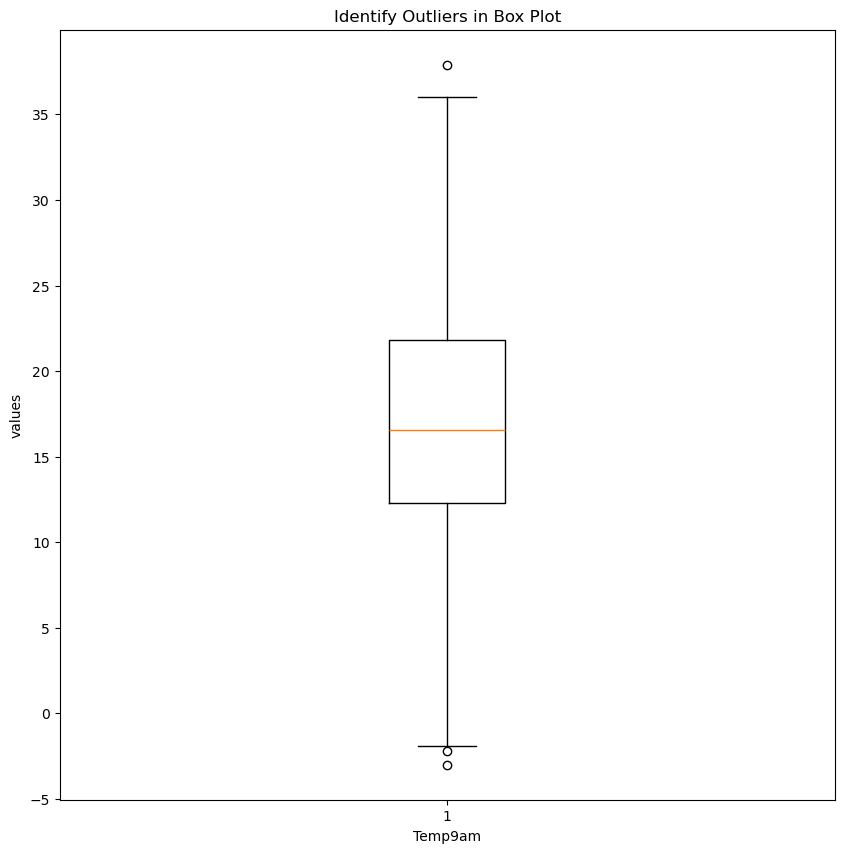

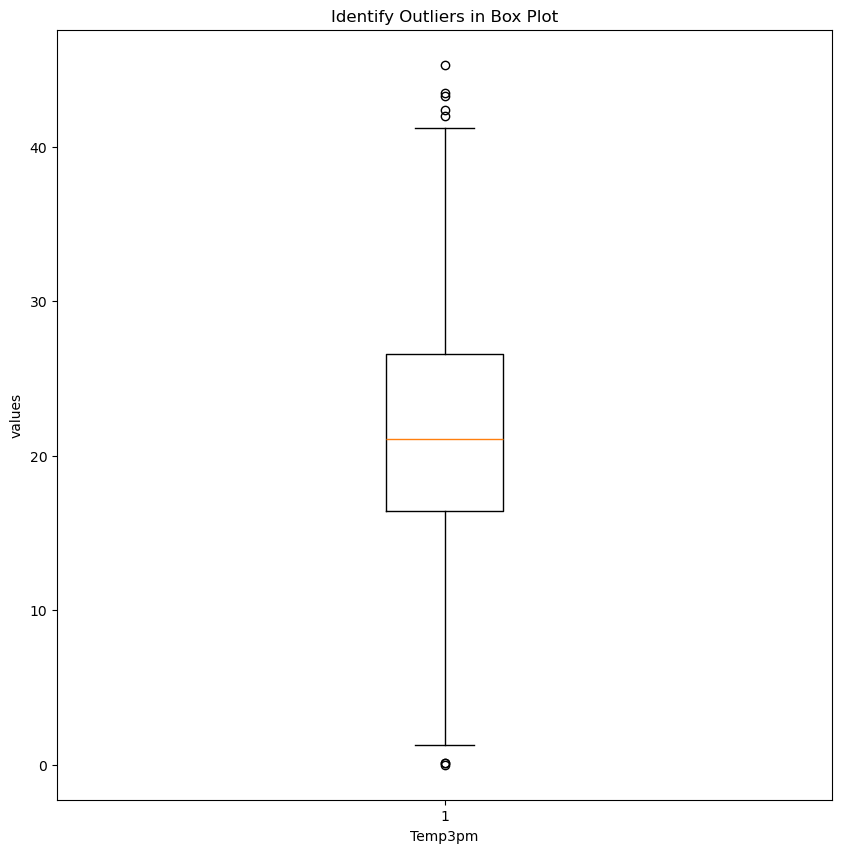

In [15]:
for column in data.select_dtypes(include=["float64"]).columns:
    plt.figure(figsize=(10,10))
    plt.boxplot(data[column].dropna())
    plt.title("Identify Outliers in Box Plot")
    plt.xlabel(f"{column}")
    plt.ylabel("values")
    plt.show()
    

{'whiskers': [<matplotlib.lines.Line2D at 0x157c67740>,
 'caps': [<matplotlib.lines.Line2D at 0x157bff830>,
 'boxes': [<matplotlib.lines.Line2D at 0x157b386b0>],
 'medians': [<matplotlib.lines.Line2D at 0x157bfc650>],
 'fliers': [<matplotlib.lines.Line2D at 0x157bffaa0>],
 'means': []}

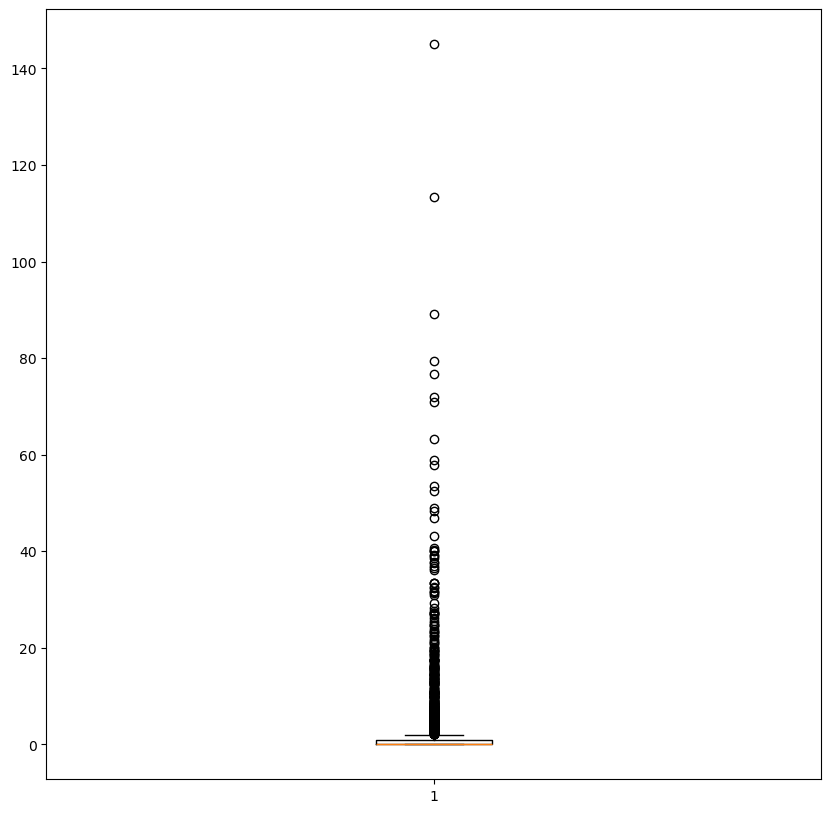

In [17]:
plt.figure(figsize=(10,10))
plt.boxplot(data["Rainfall"].dropna())

### Correlation Matrix and Scatter Plot Relations

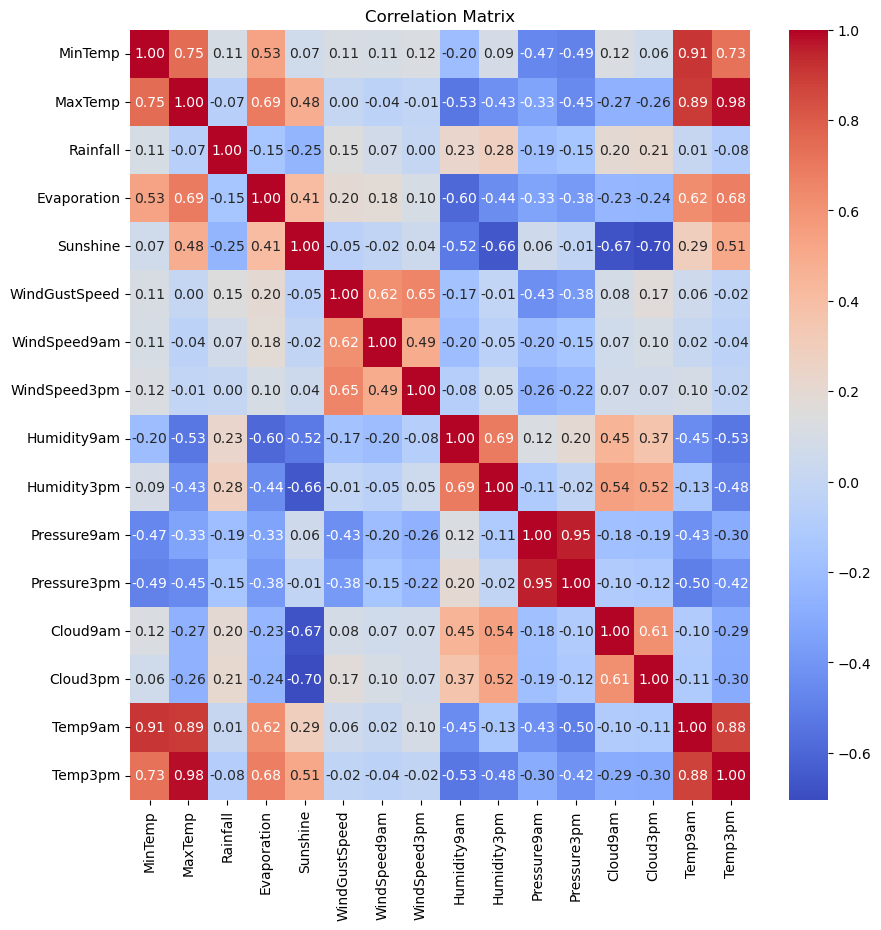

In [31]:

plt.figure(figsize=(10,10))
sns.heatmap(data[data.select_dtypes(include=["float64"]).columns].dropna().corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

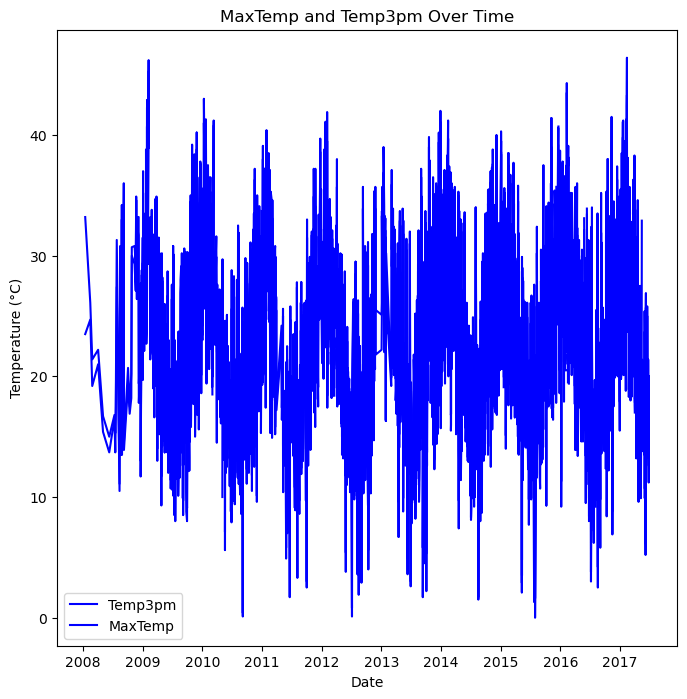

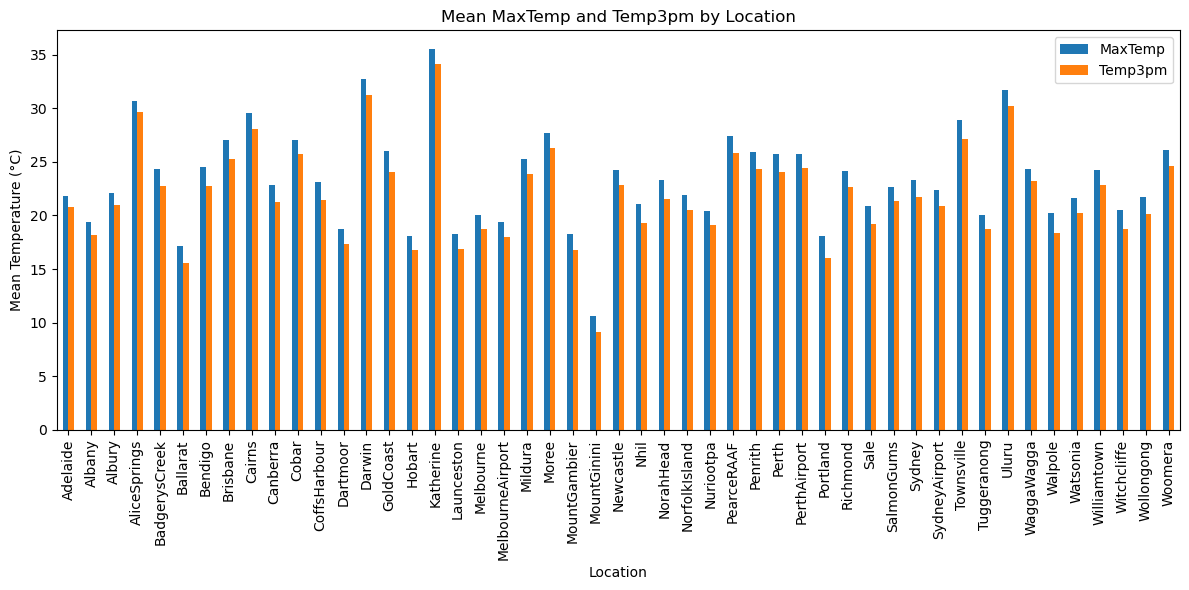

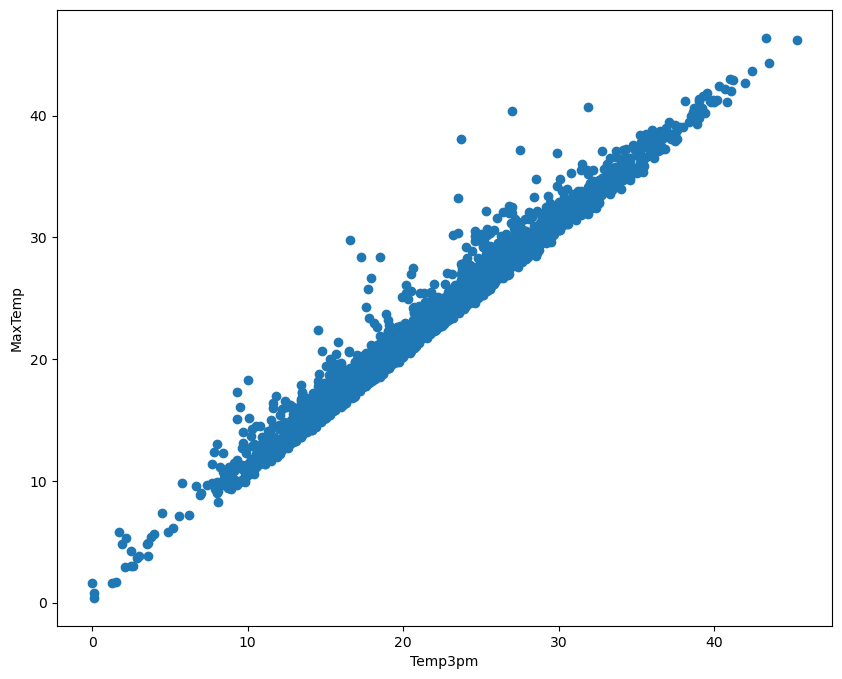

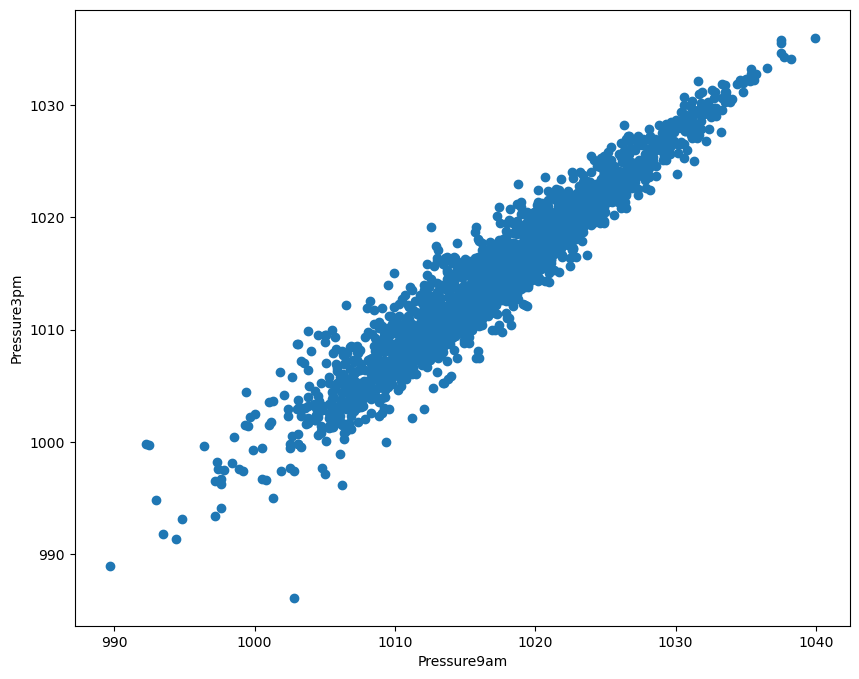

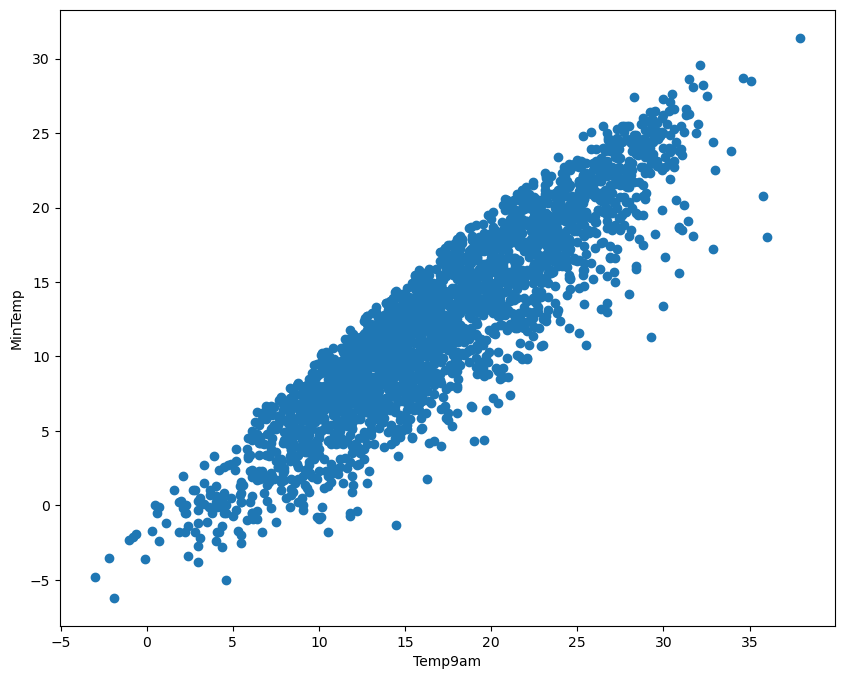

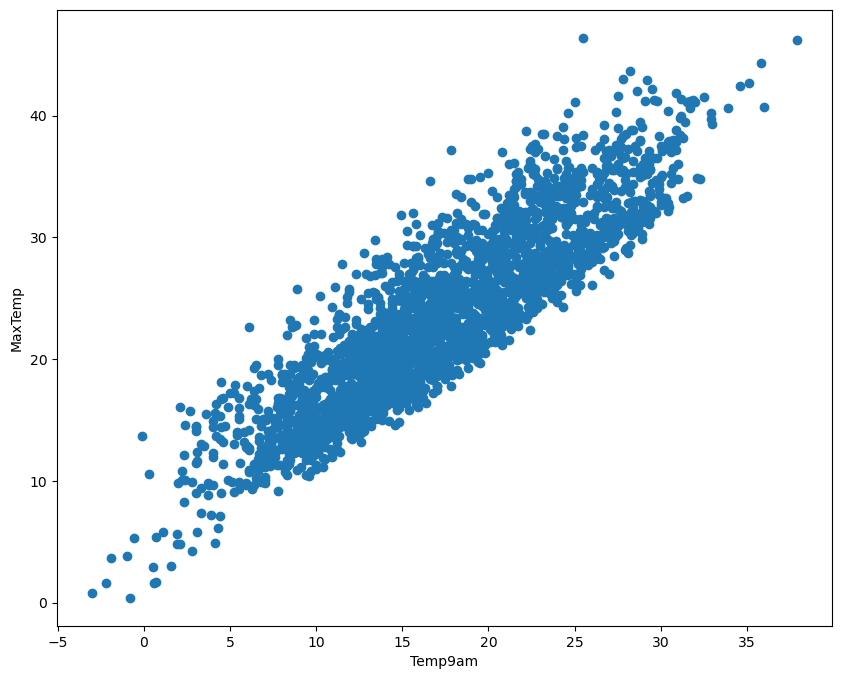

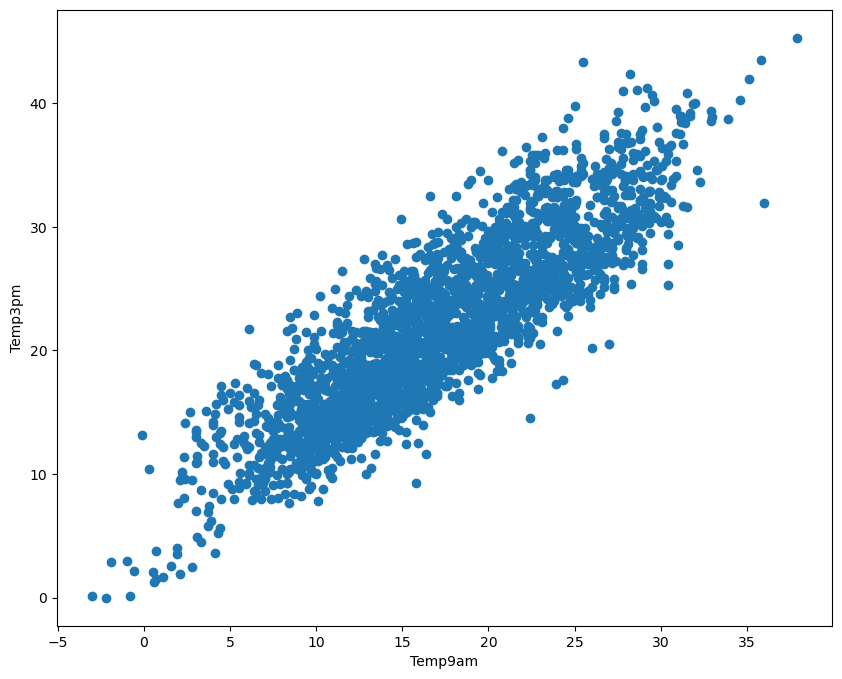

In [285]:

data["Date"] = pd.to_datetime(data["Date"], format="%Y-%m-%d")
sorted_data = data.sort_values(by="Date")
plt.figure(figsize=(8,8))
plt.plot(sorted_data["Date"], sorted_data["Temp3pm"], label="Temp3pm", color="blue")
plt.plot(sorted_data["Date"], sorted_data["MaxTemp"], label="MaxTemp", color="blue")

plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('MaxTemp and Temp3pm Over Time')
plt.legend()

mean_temps = data.groupby('Location')[['MaxTemp', 'Temp3pm']].mean()

# Create a bar plot to compare mean temperatures across locations
mean_temps.plot(kind='bar', figsize=(12, 6))

# Add labels and title
plt.xlabel('Location')
plt.ylabel('Mean Temperature (°C)')
plt.title('Mean MaxTemp and Temp3pm by Location')
plt.legend(['MaxTemp', 'Temp3pm'])
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,8))
plt.scatter(data["Temp3pm"], data["MaxTemp"])
plt.xlabel("Temp3pm")
plt.ylabel("MaxTemp")
plt.show()

plt.figure(figsize=(10,8))
plt.scatter(data["Pressure9am"], data["Pressure3pm"])
plt.xlabel("Pressure9am")
plt.ylabel("Pressure3pm")
plt.show()

plt.figure(figsize=(10,8))
plt.scatter(data["Temp9am"], data["MinTemp"])
plt.xlabel("Temp9am")
plt.ylabel("MinTemp")
plt.show()

plt.figure(figsize=(10,8))
plt.scatter(data["Temp9am"], data["MaxTemp"])
plt.xlabel("Temp9am")
plt.ylabel("MaxTemp")
plt.show()

plt.figure(figsize=(10,8))
plt.scatter(data["Temp9am"], data["Temp3pm"])
plt.xlabel("Temp9am")
plt.ylabel("Temp3pm")
plt.show()







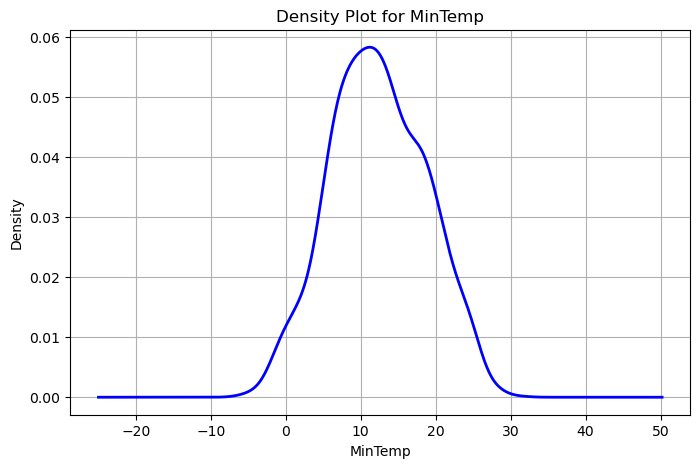

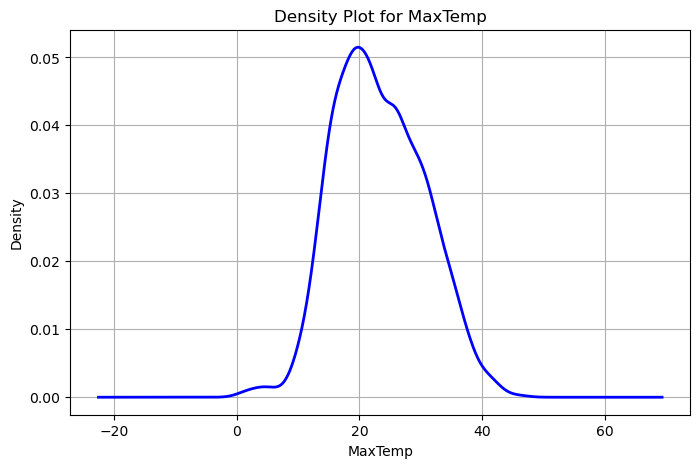

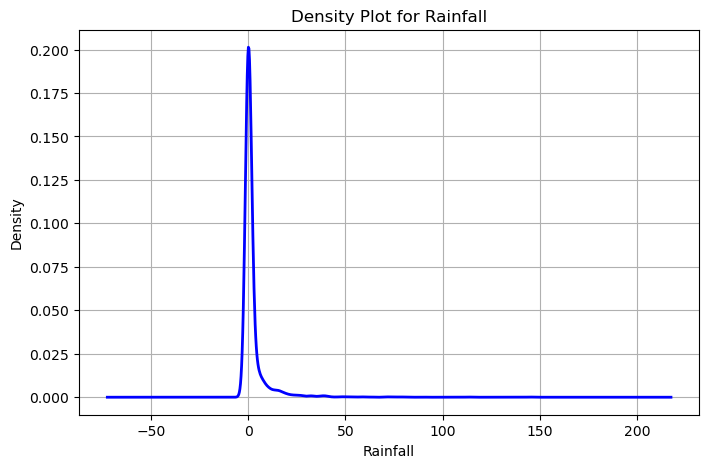

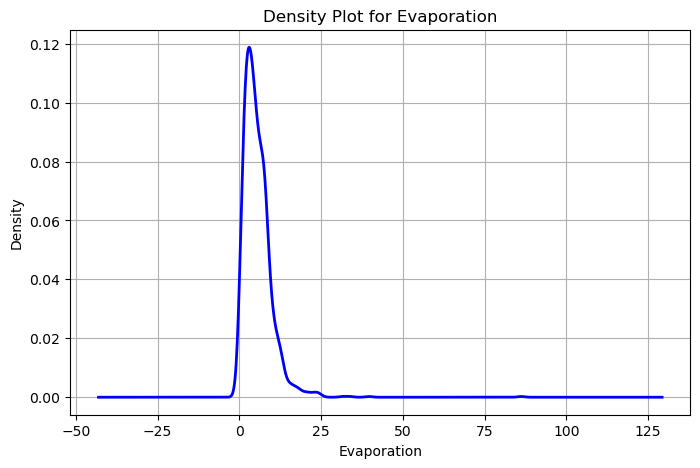

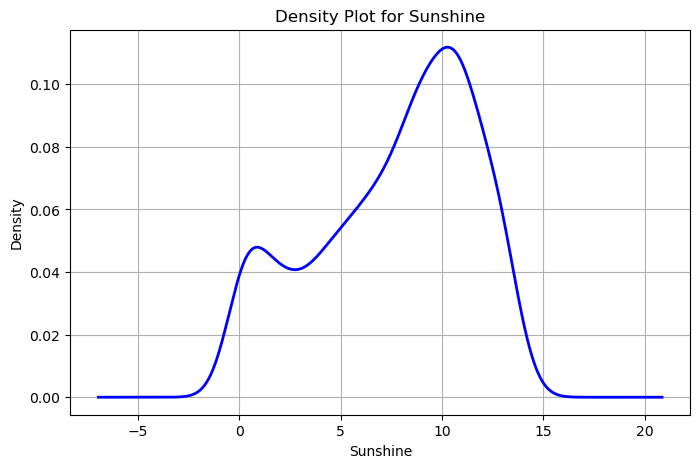

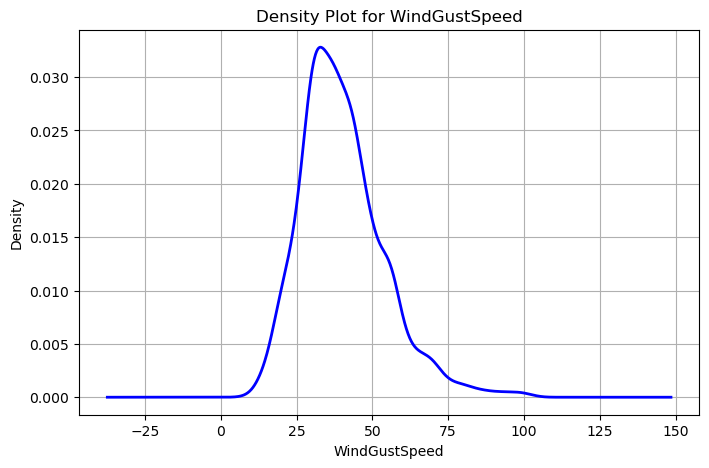

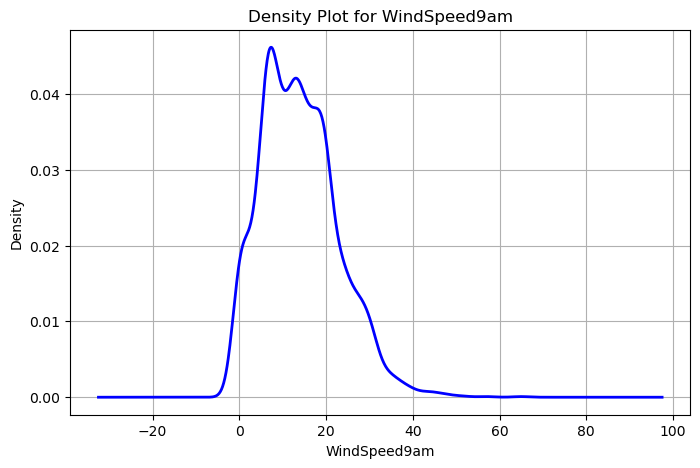

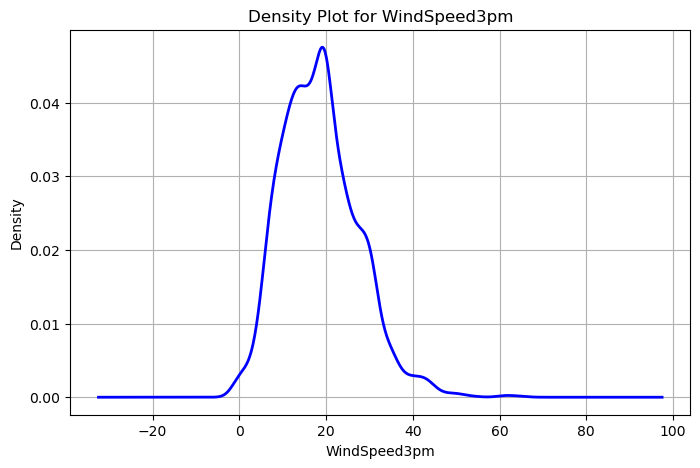

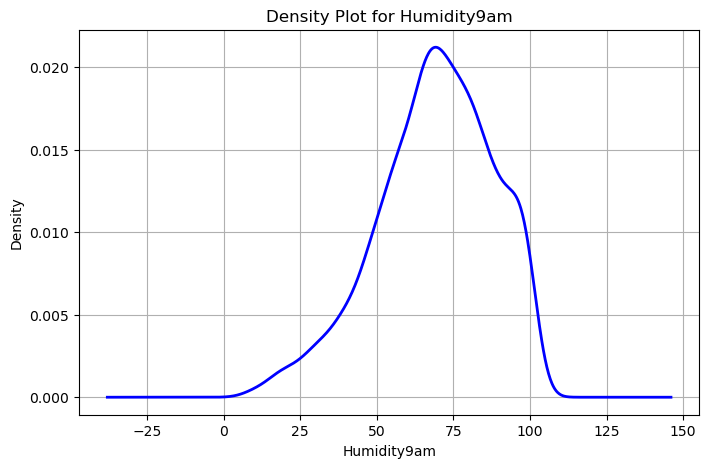

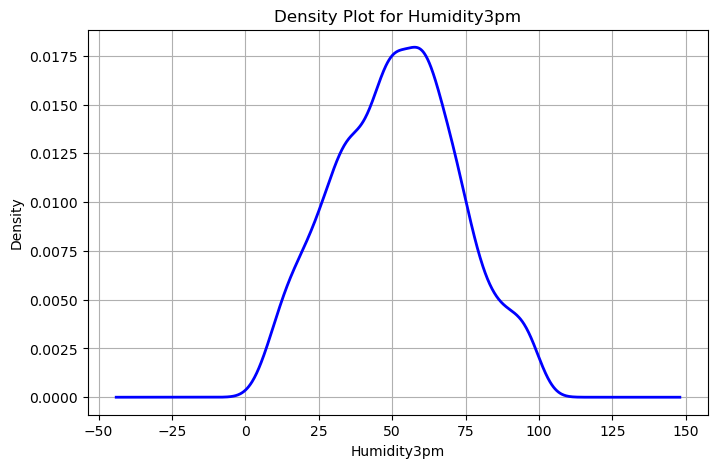

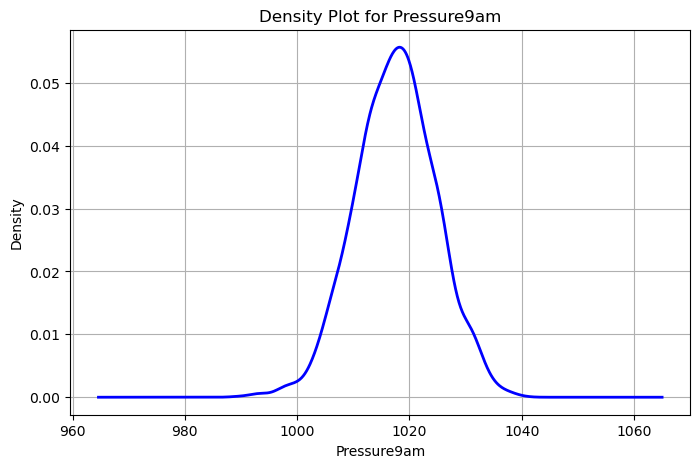

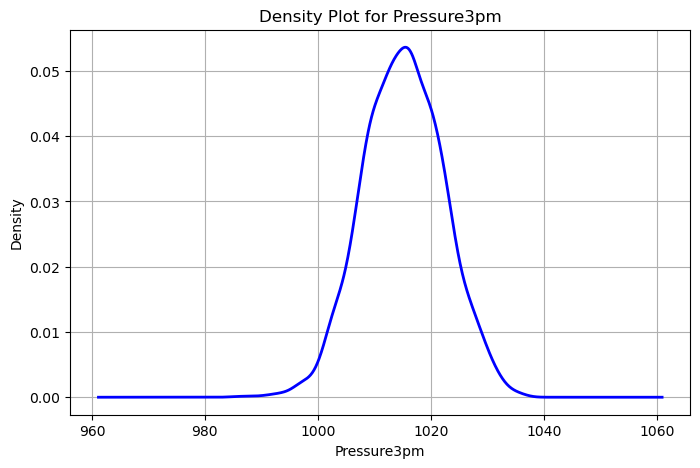

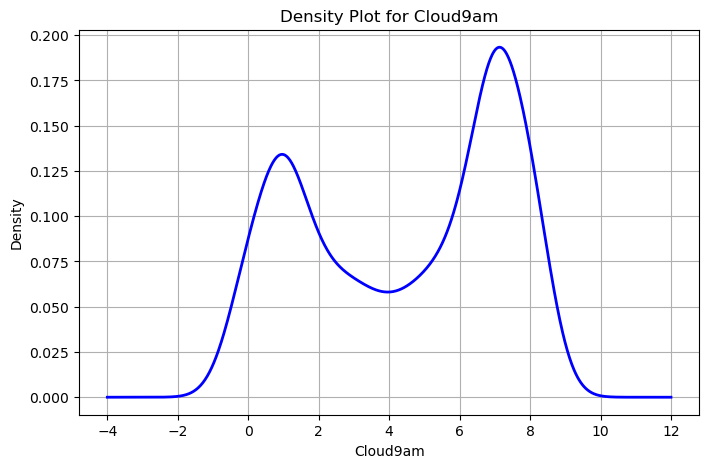

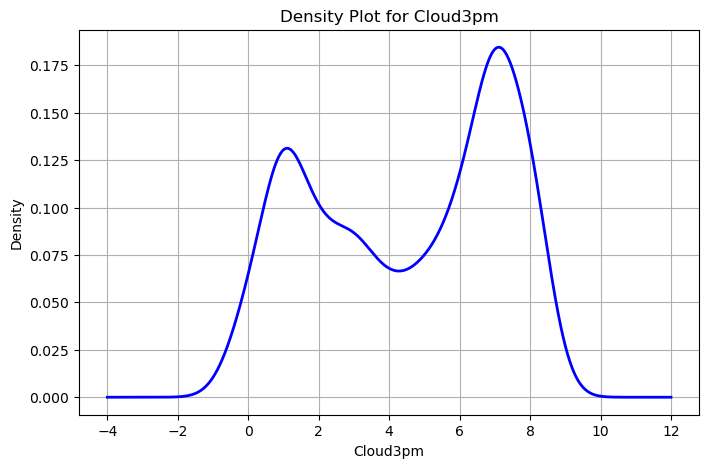

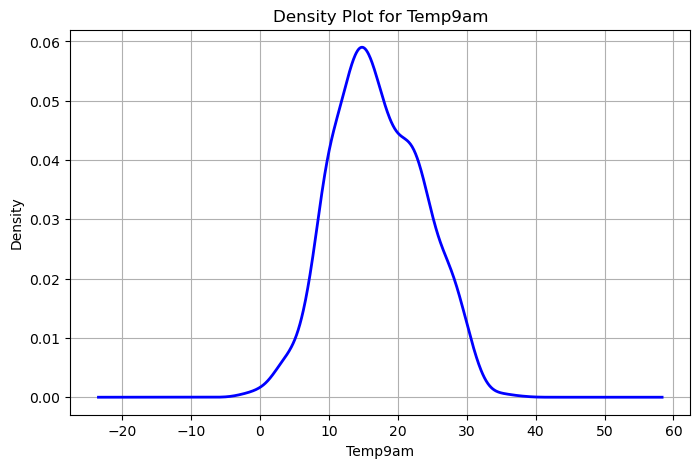

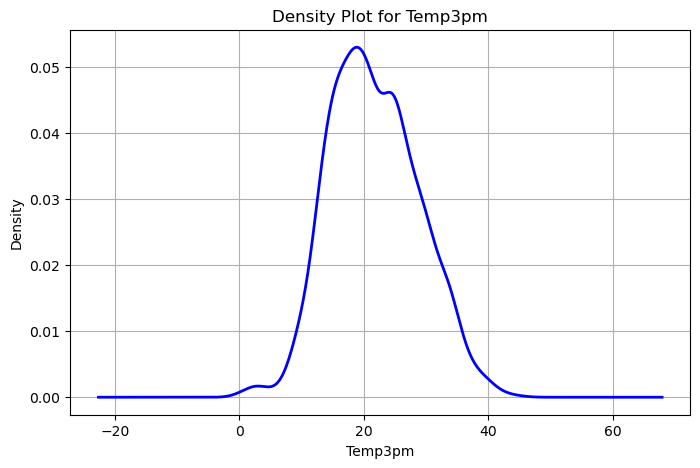

In [17]:

for column in data.select_dtypes(include=["float64"]).columns:
    plt.figure(figsize=(8, 5))
    data[column].dropna().plot(kind='kde', color='blue', linewidth=2)
    plt.title(f'Density Plot for {column}')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.grid(True)
    plt.show()

### Clustering

**KMeans Clustering**

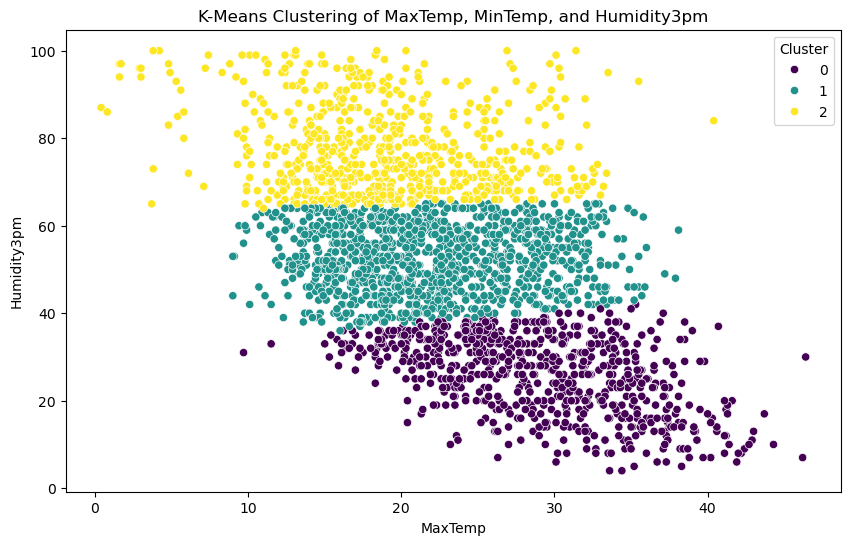

In [69]:
clust = KMeans(n_clusters=3)
data_cleaned = data[["MaxTemp", "MinTemp",  "Humidity3pm"]].dropna()
clust.fit(data_cleaned)


data_cleaned['Cluster'] = clust.labels_


plt.figure(figsize=(10, 6))
sns.scatterplot(x='MaxTemp', y='Humidity3pm', hue='Cluster', data=data_cleaned, palette='viridis')


plt.title('K-Means Clustering of MaxTemp, MinTemp, and Humidity3pm')
plt.show()

**Agglomerative Clustering**

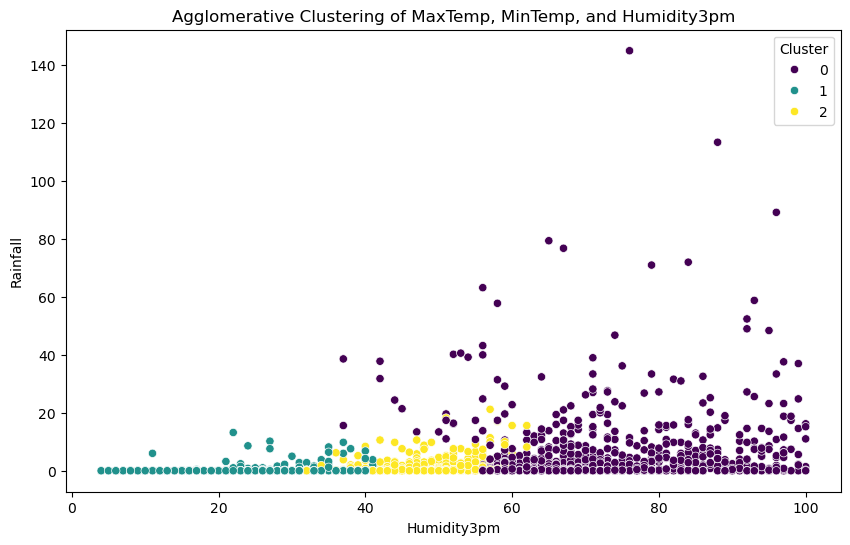

In [107]:
clust = AgglomerativeClustering(n_clusters=3)
data_cleaned = data[["MaxTemp", "MinTemp", "Humidity3pm", "Rainfall"]].dropna()
clust.fit(data_cleaned)

# Add cluster labels to the DataFrame
data_cleaned['Cluster'] = clust.labels_

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Humidity3pm', y='Rainfall', hue='Cluster', data=data_cleaned, palette='viridis')

# Display the plot
plt.title('Agglomerative Clustering of MaxTemp, MinTemp, and Humidity3pm')
plt.show()

## Data Preprocessing

### Binning

**Equiwidth**

In [16]:
cleared_rainfall = data['Rainfall'].fillna(data["Rainfall"].median(), inplace=False).replace(0, pd.NA).dropna()
num_bins = 4
bin_width = pd.cut(cleared_rainfall, bins= num_bins, labels= [f"Bin{i + 1}" for i in range(num_bins)])
data_bin_width = pd.DataFrame({"Rainfall": cleared_rainfall, "Equiwidth": bin_width})
data_bin_width.tail()

,Rainfall,Equiwidth
2604,4.2,Bin1
2610,0.4,Bin1
2613,3.8,Bin1
2614,19.4,Bin1
2616,19.0,Bin1


**Equidepth**

In [18]:
bin_depth = pd.qcut(cleared_rainfall, q=4, labels=[f"Bin{i + 1}" for i in range(4)], duplicates="drop")
data_bin = pd.DataFrame({"Rainfall": cleared_rainfall, "Equiwidth": bin_width, "Equidepth": bin_depth})
data_bin.head()


,Rainfall,Equiwidth,Equidepth
3,0.2,Bin1,Bin1
7,0.6,Bin1,Bin2
9,0.4,Bin1,Bin1
11,0.8,Bin1,Bin2
17,0.2,Bin1,Bin1


**Frequency Graphs for Equiwidth and Equidepth**

/var/folders/8v/qbgqy7v13fg89xqn0kp6bkyh0000gn/T/ipykernel_47494/2732710132.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cleared_rainfall.groupby(bin_width).size().plot(kind='bar', edgecolor='black', alpha=0.7)


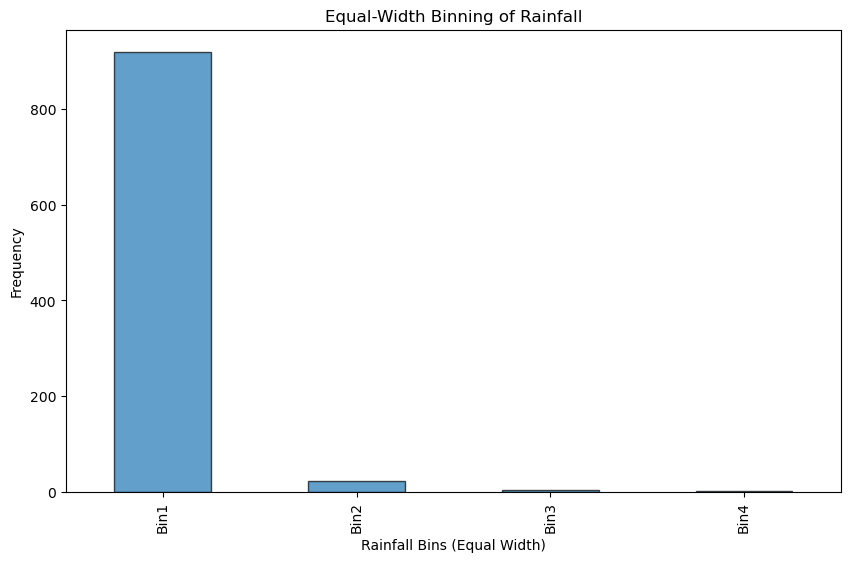

/var/folders/8v/qbgqy7v13fg89xqn0kp6bkyh0000gn/T/ipykernel_47494/2732710132.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cleared_rainfall.groupby(bin_depth).size().plot(kind='bar', edgecolor='black', alpha=0.7)


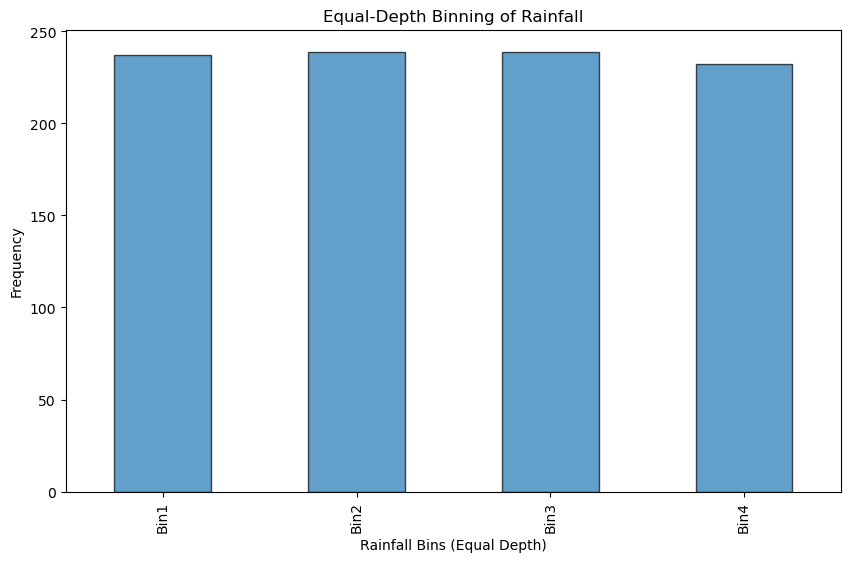

In [20]:
plt.figure(figsize=(10, 6))
cleared_rainfall.groupby(bin_width).size().plot(kind='bar', edgecolor='black', alpha=0.7)
plt.title('Equal-Width Binning of Rainfall')
plt.xlabel('Rainfall Bins (Equal Width)')
plt.ylabel('Frequency')
plt.show()

# Plotting Equal-Depth Binning
plt.figure(figsize=(10, 6))
cleared_rainfall.groupby(bin_depth).size().plot(kind='bar', edgecolor='black', alpha=0.7)
plt.title('Equal-Depth Binning of Rainfall')
plt.xlabel('Rainfall Bins (Equal Depth)')
plt.ylabel('Frequency')
plt.show()

### Normalization

**MinMax Normalization**

In [21]:
min_max = MinMaxScaler()
data_to_normalise_min_max = min_max.fit_transform(data["MaxTemp"].fillna(data["MaxTemp"].mean()).values.reshape(-1,1))
normalised_data = pd.DataFrame(data_to_normalise_min_max, columns=["MaxTempMinMax"])

normalised_data.head()


,MaxTempMinMax
0,0.750000
1,0.834783
2,0.523913
3,0.408696
4,0.376087


**Z-Score Normalization**

In [24]:
standard_scale = StandardScaler()
data_to_normalise_zcore = standard_scale.fit_transform(data["MaxTemp"].fillna(data["MaxTemp"].mean()).values.reshape(-1,1))
normalised_data = pd.DataFrame(data["MaxTemp"].fillna(data["MaxTemp"].mean()), columns=["MaxTemp"])
normalised_data["MinMax"] = data_to_normalise_min_max
normalised_data["ZScore"] = data_to_normalise_zcore
normalised_data.head()

,MaxTemp,MinMax,ZScore
0,34.9,0.750000,1.608376
1,38.8,0.834783,2.146066
2,24.5,0.523913,0.174533
3,19.2,0.408696,-0.556175
4,17.7,0.376087,-0.762979


### Discretisation

In [26]:
discretise = KBinsDiscretizer(n_bins=4, encode="ordinal")
data_to_discretise = discretise.fit_transform(data["WindSpeed3pm"].fillna(data["WindSpeed3pm"].median()).values.reshape(-1,1))
discreted_data = pd.DataFrame(data["WindSpeed3pm"].fillna(data["WindSpeed3pm"].median()), columns=["WindSpeed3pm"])
speed_types = {0: "Slow Wind", 1:"Medium Wind", 2:"Fast Wind", 3:"Very Fast Wind"}
discreted_data["WindSpeed3pmType"] = data_to_discretise
discreted_data["WindSpeed3pmType"] = discreted_data["WindSpeed3pmType"].map(speed_types)
discreted_data.head()

frequency = discreted_data["WindSpeed3pmType"].value_counts()
frequency






                                                           

WindSpeed3pmType
Very Fast Wind    715
Medium Wind       657
Slow Wind         626
Fast Wind         620
Name: count, dtype: int64

### Binarization

In [38]:
lb = LabelBinarizer()
print(data["WindDir9am"].dropna().describe())
binarize = lb.fit_transform(data["WindDir9am"].dropna())
binarized_data = pd.DataFrame(binarize, columns=lb.classes_)
binarized_data = pd.concat([data["WindDir9am"], binarized_data], axis=1)
binarized_data.head()

count     2434
unique      16
top          N
freq       230
Name: WindDir9am, dtype: object


,WindDir9am,E,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
0,W,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,N,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,SW,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,NW,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Saving Binning, Normalization, Binarization, and Discretisation in Excel

In [36]:
with pd.ExcelWriter('Assignment-2.xlsx', engine='xlsxwriter') as writer:
    data_bin.to_excel(writer, sheet_name="Binning")
    normalised_data.to_excel(writer, sheet_name="Normalization")
    discreted_data.to_excel(writer, sheet_name="Discretise")
    binarized_data.to_excel(writer, sheet_name="Binarization")